<a href="https://colab.research.google.com/github/becerraj/Data-Science/blob/main/DataScience_Analysis_End_to_End.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importe de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

Carga de los datasets

In [2]:
train = pd.read_csv("/content/Train_BigMart.csv")
test = pd.read_csv("/content/Test_BigMart.csv")

len(train.columns) - len(test.columns)
print("Hay", len(train.columns) - len(test.columns), "columna mas en el train que en el test\nLa columna con el valor a encontrar es:", train.columns[len(train.columns) - 1])

Hay 1 columna mas en el train que en el test
La columna con el valor a encontrar es: Item_Outlet_Sales


#Analisis del DataSet

El dataset se comprende de observaciones de ventas de ciertos productos (o items) en ciertos locales (o outlets) de una misma franquicia o negocio. Donde para cada uno tendremos un identificador, uno para los Item, y tambien un identificador de Outlet

Podemos diferenciar el dataset en dos sectores distintos: sector ITEM y sector OUTLET.

##Variables del Dataset

Las columnas del Dataset son las siguientes:

**Item_Identifier**: nombre o identificador del producto

**Item_Weight**: peso del producto en gramos

**Item_Fat_Content**: clasificación del producto en términos de grasas contenidas en él.

**Item_Visibility**: scoring de visibilidad del producto: medida que hace referencia al
conocimiento del producto en el consumidor. ¿Qué tan fácil puede ser encontrado el
producto?

**Item_Type**: tipo de producto

**Item_MRP**: máximum retailed price. Precio calculado por el fabricante que indica el
precio más alto que se puede cobrar por el producto.

**Outlet_Identifier**: identificador de la tienda

**Outlet_Establishment_Year**: año de lanzamiento de la tienda

**Outlet_Size**: tamaño de la tienda

**Outlet_Location_Type**: clasificación de las tiendas según ubicación

**Outlet_Type**: tipo de tienda

**Item_Outlet_Sales**: ventas del producto en cada observacion

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
# Analizo tipos de datos de cada columna
for i in range(0,len(train.columns)-1):
  print(train.columns[i], ":", train.iloc[:,i].dtype)

Item_Identifier : object
Item_Weight : float64
Item_Fat_Content : object
Item_Visibility : float64
Item_Type : object
Item_MRP : float64
Outlet_Identifier : object
Outlet_Establishment_Year : int64
Outlet_Size : object
Outlet_Location_Type : object
Outlet_Type : object


##Variables Continuas

'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'

Teniendo 4 columnas con valores numericos, voy a analizarlos. Para eso, primero veo la distribucion que tienen. Busco evitar valores con mucho sesgo, outliers, y que la distribucion sea lo mas parecido a una normal

In [6]:
columnas_numericas = train.select_dtypes(include=['float64']).columns
columnas_numericas

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

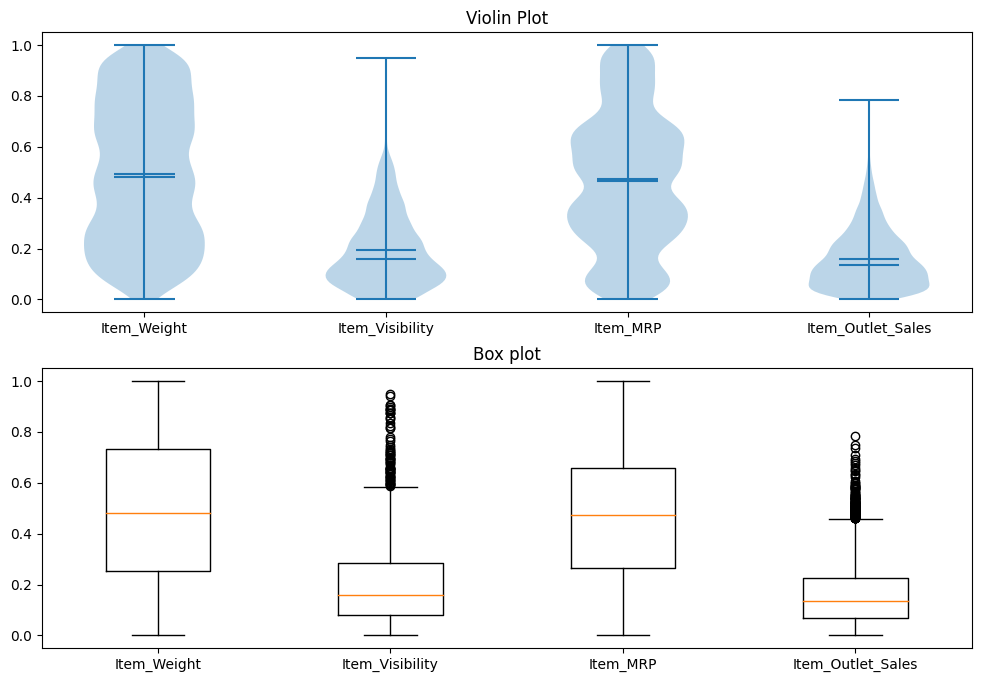

In [7]:
columnas_numericas = train.select_dtypes(include=['float64']).columns
scaler = MinMaxScaler()
train_to_plot = scaler.fit_transform(train.loc[:, columnas_numericas])
train_to_plot = pd.DataFrame(data=train_to_plot, columns = columnas_numericas)


fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))


axs[0].violinplot(train_to_plot.dropna().astype('float64'),
                    showmeans=True,
                    showmedians=True)
axs[0].set_title('Violin Plot')
axs[0].set_xticks(range(1, len(columnas_numericas) + 1))
axs[0].set_xticklabels(columnas_numericas)

# plot box plot
axs[1].boxplot(train_to_plot.dropna().astype('float64'))
axs[1].set_title('Box plot')
axs[1].set_label(columnas_numericas)
axs[1].set_xticks(range(1, len(columnas_numericas) + 1))
axs[1].set_xticklabels(columnas_numericas)

plt.show()

In [8]:
train_to_plot.loc[:, columnas_numericas].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,0.494352,0.201382,0.465635,0.164551
std,0.276479,0.157123,0.264327,0.130729
min,0.000000,0.000000,0.000000,0.000000
25%,0.251191,0.082187,0.265437,0.061359
50%,0.479012,0.164228,0.474209,0.134908
75%,0.732063,0.288026,0.655156,0.235030
max,1.000000,1.000000,1.000000,1.000000


## Variables Categoricas

'Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',

'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'

###Item_Fat_Content

Categorico NO Ordinal.

Si bien podria ser que fuera ordinal, la distribucion de los graficos de la variable a predecir segun el Item_Fat_Content son practicamente iguales. Por lo tanto asumo que es NO ordinal y debemos hacerle un One-Hot-Encoder a esta variable.

Requiere transformacion de datos a las mismas categorias de Low Fat y Regular. Haremos el cambio a 0 y 1 directamente.

Low Fat (y sus variantes) seran 0

Regular (y sus variantes) seran 1


```
train.loc[train.Item_Fat_Content.isin(['Low Fat', 'LF', 'low fat']), 'Item_Fat_Content'] = 0
train.loc[train.Item_Fat_Content.isin(['Regular', 'reg']), 'Item_Fat_Content'] = 1
```

A partir de eso despues se le hara el One-Hot-Encoder.



In [9]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [10]:
train.loc[train.Item_Fat_Content.isin(['Low Fat', 'LF', 'low fat']), 'Item_Fat_Content'] = 'Low Fat'
train.loc[train.Item_Fat_Content.isin(['Regular', 'reg']), 'Item_Fat_Content'] = 'Regular'

###Item_Type

Categorico NO Ordinal.

16 tipos de datos

A juzgar por mi (poco) conocimiento del rubro alimenticio, imagino que esta variable puede estar muy relacionada al precio final del producto. Voy a hacer graficos teniendo en cuenta esta variable, y todas las variables numericas.

In [11]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

No parece haber una relacion clara entre los tipos de producto y su venta.

Salvo por el peso del producto y su MRP, pareciera que todos los productos siguen las mismas distribuciones con respecto a las variables numericas.

Aunque no pareciera dar mucha informacion valiosa, aprovechando que tenemos pocas columnas con respecto a la cantidad de observaciones, voy a hacer ***One-Hot-Encoding*** de esta variable.

Tendremos n-1 columnas nuevas donde n=16.

Son muchas columnas. Probablemente si tuvieramos algun listado de precios podriamos ver si es factible pensar esta variable como ordinal.

### Outlet_Location_Type

Variable categorica NO Ordinal.

Las ubicaciones casi nunca son ordinales. Tambien se aplicara ***One-Hot-Encoding***.

Tendremos n-1 columnas nuevas con n=3

In [12]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

### Outlet_Type

Variable categorica NO Ordinal.

Sin conocer de que estamos hablando en cuanto a tipos, no queda otra posibilidad mas que suponerla como NO ordinal. Tambien se aplicara One-Hot-Encoding.

Tendremos n-1 columnas nuevas con n=4

In [13]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

### Outlet_Establishment_Year

Variable categorica NO Ordinal.

Tendremos n-1 columnas nuevas con n=9

In [14]:
train.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

#NaN Values


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64



<Axes: >

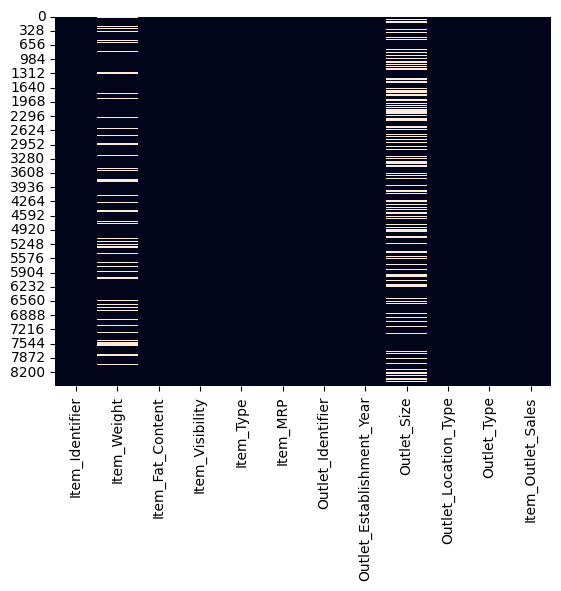

In [15]:
# Analizo cantidad de valores nulos por columna
print("\n",train.isnull().sum(),"\n", sep="")
# Vemos que solamente Item_Weight y Outlet_Size tienen valores nulos.
sns.heatmap(train.isnull(), cbar=False)

##Transformacion de Datos Numericos

In [16]:
cantidad_de_productos = len(train.Item_Identifier.unique())
print("En", len(train), "observaciones hay solamente", cantidad_de_productos, "productos distintos. Por lo que muchos se repiten.")

En 8523 observaciones hay solamente 1559 productos distintos. Por lo que muchos se repiten.


In [17]:
train.loc[train['Item_Identifier'] == 'FDP10', ['Item_Identifier', 'Item_Weight']]


,Item_Identifier,Item_Weight
7,FDP10,NaN
585,FDP10,19.0
2623,FDP10,19.0
3382,FDP10,19.0
4585,FDP10,19.0
6087,FDP10,19.0
7883,FDP10,19.0


Como hay mas observaciones que productos, voy a analizar la posibilidad de rellenar aquellas celdas que esten marcadas como NA segun el mismo identificador de producto.
Por ejemplo, el peso del producto no deberia cambiar si tenemos el mismo identificador del producto.
Lo mismo ocurre con el tamano de la tienda y el identificador de la tienda.

In [18]:
# Tomo indices de las filas que tienen NA en el Item_Weight
indices_filas_NA_weight = train.loc[train.loc[:,'Item_Weight'].isna()].index

# Le asigno los valores del identificador que tiene ese indice
identificador_item_NA_weight = train.loc[indices_filas_NA_weight, 'Item_Identifier']

# Dentro de los valores NA, cuantos repeticiones encontramos?
print(len(identificador_item_NA_weight) - len(identificador_item_NA_weight.unique()))
# Como hay repetidos, me quedo solamente con los unicos
identificador_item_NA_weight = identificador_item_NA_weight.unique()
# Solo para asegurarme que tiene sentido esta teoria, comrpuebo con un valor que tiene NA: FDP10
train.loc[train['Item_Identifier'] == 'FDP10', ['Item_Identifier', 'Item_Weight']]
# Vemos que efectivamente todos sus weights son iguales. Tiene sentido cambiarlo.

# Hago diccionario que tenga por cada identificador, su weight
item_weight = {}
for identificador in identificador_item_NA_weight:
  # Hago un nuevo DF solo con el identificador de interes
  identificador_con_NA = train.loc[train['Item_Identifier'] == identificador, ['Item_Identifier', 'Item_Weight']]

  # Si hay mas de un valor ademas del NAN tenemos que buscar el que mas se repita para asignarlo
  if (len(identificador_con_NA.groupby('Item_Weight')) > 1):
    # Por las dudas tengamos 3 valores distintos, incluyendo el NA, uso dropna() antes de agrupar
    contador_por_grupo = pd.DataFrame({'Weight': identificador_con_NA['Item_Weight'].dropna().unique(),
                                       'Conteo' : identificador_con_NA.dropna().groupby('Item_Weight').size()})
    weight_mas_repetido = contador_por_grupo.loc[contador_por_grupo['Conteo'] == contador_por_grupo['Conteo'].max()]

    # Si aun asi siguen habiendo mas de un peso repetido en la misma cantidad de veces hacemos la media entre ellos
    if len(weight_mas_repetido) > 1:
      weight_reemplazo = weight_mas_repetido['Weight'].mean()
    else:
      weight_reemplazo = weight_mas_repetido['Weight']

  # 2 posibilidades: No hay mas de 2 weights para el producto. No hay otro producto sin NAN en su weight
  else:
    if len(identificador_con_NA['Item_Weight'].unique()) == 1:
      # Por ahora le voy a asignar valor 0. Luego lo resolveremos
      weight_reemplazo = np.array([0])
    else:
      # En caso de que no hayan varios valores de weight para un mismo producto (seria lo logico), se resuelve facil:
      weight_reemplazo = identificador_con_NA['Item_Weight'].dropna().unique()

  item_weight[identificador] = weight_reemplazo.item()

321


In [19]:
# Ahora que tenemos el diccionario que contiene KEY=Identificador ITEM=Weight, podemos reemplazar los valores NAN del Weight

for indice in indices_filas_NA_weight:
  train.loc[indice, 'Item_Weight'] = item_weight[train.loc[indice, 'Item_Identifier']]

In [20]:
print(pd.crosstab(index=train['Outlet_Establishment_Year'], columns=train['Outlet_Size']
           ).apply(lambda r: r/r.sum(),
                                axis=1))
cross_year = pd.crosstab(index=train['Outlet_Establishment_Year'], columns=train['Outlet_Size']
           ).apply(lambda r: r/r.sum(),
                                axis=1)

Outlet_Size                High    Medium     Small
Outlet_Establishment_Year                          
1985                        0.0  0.639098  0.360902
1987                        1.0  0.000000  0.000000
1997                        0.0  0.000000  1.000000
1999                        0.0  1.000000  0.000000
2004                        0.0  0.000000  1.000000
2009                        0.0  1.000000  0.000000


In [21]:
print(pd.crosstab(index=train['Outlet_Location_Type'], columns=train['Outlet_Size']
           ).apply(lambda r: r/r.sum(),
                                axis=1))

cross_size = pd.crosstab(index=train['Outlet_Location_Type'], columns=train['Outlet_Size']
           ).apply(lambda r: r/r.sum(),
                                axis=1)

Outlet_Size               High    Medium     Small
Outlet_Location_Type                              
Tier 1                0.000000  0.389447  0.610553
Tier 2                0.000000  0.000000  1.000000
Tier 3                0.333453  0.666547  0.000000


In [22]:
print(pd.crosstab(index=train['Outlet_Type'], columns=train['Outlet_Size']
           ).apply(lambda r: r/r.sum(),
                                axis=1))

cross_type = pd.crosstab(index=train['Outlet_Type'], columns=train['Outlet_Size']
           ).apply(lambda r: r/r.sum(),
                                axis=1)

Outlet_Size            High    Medium     Small
Outlet_Type                                    
Grocery Store      0.000000  0.000000  1.000000
Supermarket Type1  0.250403  0.249866  0.499731
Supermarket Type2  0.000000  1.000000  0.000000
Supermarket Type3  0.000000  1.000000  0.000000


In [23]:
cross_year.columns

Index(['High', 'Medium', 'Small'], dtype='object', name='Outlet_Size')

In [24]:
OUT010 = train.loc[train.Outlet_Identifier == 'OUT010', ['Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Establishment_Year']].head(1)
OUT010

,Outlet_Size,Outlet_Type,Outlet_Location_Type,Outlet_Establishment_Year
3,NaN,Grocery Store,Tier 3,1998


In [25]:
OUT045 = train.loc[train.Outlet_Identifier == 'OUT045', ['Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Establishment_Year']].head(1)
OUT045

,Outlet_Size,Outlet_Type,Outlet_Location_Type,Outlet_Establishment_Year
8,NaN,Supermarket Type1,Tier 2,2002


In [26]:
OUT017 = train.loc[train.Outlet_Identifier == 'OUT017', ['Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Establishment_Year']].head(1)
OUT017

,Outlet_Size,Outlet_Type,Outlet_Location_Type,Outlet_Establishment_Year
9,NaN,Supermarket Type1,Tier 2,2007


In [27]:
train.Outlet_Size.value_counts() / train.Outlet_Size.value_counts().sum()



Medium    0.456895
Small     0.390643
High      0.152462
Name: Outlet_Size, dtype: float64

#One-Hot-Encoding

Una vez definidas las variables a las que aplicaremos One-Hot-Encoding, procedo a realizarlo con la funcion ```pd.get_dummies()``` de pandas.



In [28]:
one_hot_encoded_train = pd.get_dummies(train, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type'])

## KNN Imputer Valores NaN

Antes de ello, vamos a darle los valores de 1, 2, 3 segun el tamano de la tienda. Luego los vamos a pasar por un One-Hot-Encoding, pero para que encuentre mas facilmente vecinos con KNN primero vamos a separarlos lo mas posible.

Una manera de validarlo seria analizar si todos los identificadores de outlets con Grocery Store tienen el mismo valor. Antes habiamos visto que uno de los outlets faltantes era el unico que tenia Grocery Store, y se supone que debiera ser siempre small.

Otro aproach posible es hacer este KNN solamente tomando las columnas relacionadas al Outlet. Porque capaz no tenga mucho que ver la informacion sobre los productos.

In [29]:
one_hot_encoded_train.loc[one_hot_encoded_train.Outlet_Size == 'Small', 'Outlet_Size'] = 1
one_hot_encoded_train.loc[one_hot_encoded_train.Outlet_Size == 'Medium', 'Outlet_Size'] = 2
one_hot_encoded_train.loc[one_hot_encoded_train.Outlet_Size == 'High', 'Outlet_Size'] = 3

print("NA ",one_hot_encoded_train.Outlet_Size.isna().sum())
print(one_hot_encoded_train.Outlet_Size.value_counts())


NA  2410
2    2793
1    2388
3     932
Name: Outlet_Size, dtype: int64


Tambien voy a guardarme en una variable los indices donde se encuentran los identificadores de los outlets que tengan su tamano faltante.

Servira para el analisis y validacion de los KNNImposter

In [30]:
print(train.loc[:,['Outlet_Identifier','Outlet_Size']].groupby('Outlet_Identifier').size())

print("\nLos outlets con datos NAN son:", train.loc[train.Outlet_Size.isna(), 'Outlet_Identifier'].unique())

print("\nLos valores que encontramos en OUT010 son:", train.loc[train.Outlet_Identifier == 'OUT010', 'Outlet_Size'].unique())
print("\nLos valores que encontramos en OUT045 son:", train.loc[train.Outlet_Identifier == 'OUT045', 'Outlet_Size'].unique())
print("\nLos valores que encontramos en OUT017 son:", train.loc[train.Outlet_Identifier == 'OUT017', 'Outlet_Size'].unique())

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
dtype: int64

Los outlets con datos NAN son: ['OUT010' 'OUT045' 'OUT017']

Los valores que encontramos en OUT010 son: [nan]

Los valores que encontramos en OUT045 son: [nan]

Los valores que encontramos en OUT017 son: [nan]


Todos los valores de los outlets 'OUT010', 'OUT045' y 'OUT017' son NAN. Me quedo con los indices de esos para despues analizar los resultados del KNNImposter

In [31]:
indices_OUT010 = train.loc[train.Outlet_Identifier == 'OUT010'].index
indices_OUT045 = train.loc[train.Outlet_Identifier == 'OUT045'].index
indices_OUT017 = train.loc[train.Outlet_Identifier == 'OUT017'].index

Ahora que tengo todas las variables de interes numericas, voy a eliminar los identificadores de los Outlets y de los Items. Luego hare el KNN para intentar buscar los valores faltantes para el tamano de los outlet.

In [32]:
one_hot_encoded_train = one_hot_encoded_train.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1)

En una situacion de un modelo de ML con KNN, habria que normalizar los datos para no generar que las variables con rangos mas amplios influencien mas a la hora de encontrar un resultado que aquellas variables con rangos mas cortos.

Pero en el caso de KNNImposter, el resultado va a darse segun la cercania que hayan entre los valores de las variables en las observaciones mas parecidas a la que estamos intentando determinar.

In [33]:
knn = KNNImputer(n_neighbors=5)
neighbors = knn.fit_transform(one_hot_encoded_train)

result_KNN = pd.DataFrame(data=neighbors, columns=one_hot_encoded_train.columns)


Analizamos los resultados del KNNImputer

In [34]:
print('La media de Outlet_Size propuesta por KNN para OUT010 es ',result_KNN.loc[indices_OUT010, 'Outlet_Size'].mean())
print('La media de Outlet_Size propuesta por KNN para OUT045 es ',result_KNN.loc[indices_OUT045, 'Outlet_Size'].mean())
print('La media de Outlet_Size propuesta por KNN para OUT017 es ',result_KNN.loc[indices_OUT017, 'Outlet_Size'].mean())


La media de Outlet_Size propuesta por KNN para OUT010 es  1.2576576576576577
La media de Outlet_Size propuesta por KNN para OUT045 es  1.7916038751345533
La media de Outlet_Size propuesta por KNN para OUT017 es  1.8138228941684664


El Outlet Size propuesto por KNNImputer para OUT010, que es el unico del que tenia un poco de intuicion sobre hacia donde podia llegar a caer el resultado, es el esperado. Esperaba que diera un resultado cercano a 1, porque significa que es un tamano pequeno, y al ser una grocery store, es de suponer que lo sea.

Por otro lado, para los otros dos Outlets vamos a tener que confiar en este resultado, teniendo en cuenta que es el mas repetido de los 3 tamanos, y que el OUT010 probablemente haya sido predicho correctamente, vamos a dejar esos resultados.

In [35]:
result_KNN.loc[indices_OUT010, 'Outlet_Size'] = 1
result_KNN.loc[indices_OUT045, 'Outlet_Size'] = 2
result_KNN.loc[indices_OUT017, 'Outlet_Size'] = 2

# Tambien se lo agrego al DF de train para poder hacer analisis sobre las variables categoricas
# sin haberse generado el One-Hot-Encoding

train.loc[indices_OUT010, 'Outlet_Size'] = 'Small'
train.loc[indices_OUT045, 'Outlet_Size'] = 'Medium'
train.loc[indices_OUT017, 'Outlet_Size'] = 'Medium'

Ahora estamos en condiciones de terminar nuestro One-Hot-Encoding de esta variable, y con esto podemos seguir con el analisis de los datos, habiendo resuelto el problema de los datos NAN.

In [36]:
train_to_model = pd.get_dummies(result_KNN, columns = ['Outlet_Size'])

# Analisis de Variables
### Analisis de variables categoricas y continuas con DataSet sin NaN

Voy a hacer un analisis de correlacion completo para ver si encuentro correlacion lineal entre las variables numericas.

Antes de hacer el analisis de coeficiente de Pearson tengo que normalizar los datos. Teniendo en cuenta los analisis anteriores, veiamos que los violin plot de las columnas Item_Visibility y Item_Outlet_Sales tienen distribuciones que con una transformacion logaritmica pueden acercarse a la forma de una normal.

In [37]:
import statsmodels.api as sm
import copy


In [38]:
train_to_plot = copy.deepcopy(train)
# Transformacion logaritmica sumando 1 para evitar tener numeros negativos
train_to_plot.Item_Visibility = np.log(train.Item_Visibility + 1)
train_to_plot.Item_Outlet_Sales = np.log10(train.Item_Outlet_Sales + 1)


train_to_plot.loc[:, columnas_numericas].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.869378,0.062904,140.992782,3.169422
std,4.653372,0.047218,62.275067,0.440901
min,0.000000,0.000000,31.290000,1.535167
25%,8.785000,0.026632,93.826500,2.921815
50%,12.600000,0.052527,143.012800,3.254145
75%,16.850000,0.090376,185.643700,3.491683
max,21.350000,0.283968,266.888400,4.116872


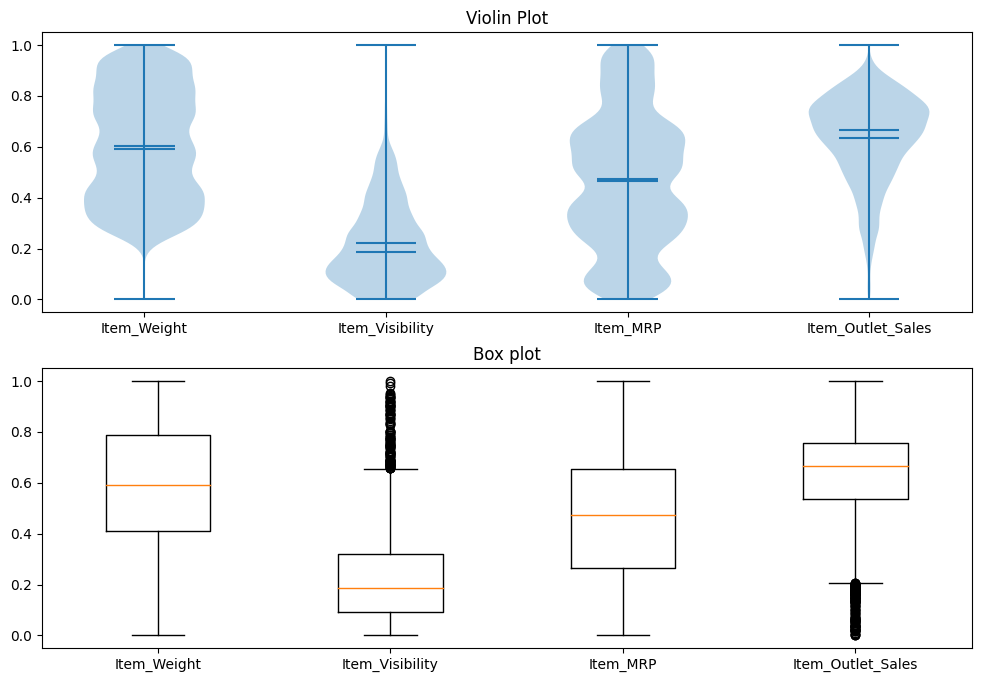

In [39]:
scaler = MinMaxScaler()
train_to_plot_num = scaler.fit_transform(train_to_plot.loc[:, columnas_numericas])
train_to_plot_num = pd.DataFrame(data=train_to_plot_num, columns = columnas_numericas)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))


axs[0].violinplot(train_to_plot_num.astype('float64'),
                    showmeans=True,
                    showmedians=True)
axs[0].set_title('Violin Plot')
axs[0].set_xticks(range(1, len(columnas_numericas) + 1))
axs[0].set_xticklabels(columnas_numericas)

# plot box plot
axs[1].boxplot(train_to_plot_num.astype('float64'))
axs[1].set_title('Box plot')
axs[1].set_label(columnas_numericas)
axs[1].set_xticks(range(1, len(columnas_numericas) + 1))
axs[1].set_xticklabels(columnas_numericas)

plt.show()

In [40]:
train_to_plot = copy.deepcopy(train)
# Transformacion logaritmica sumando 1 para evitar tener numeros negativos
train_to_plot.Item_Visibility = np.log2(train.Item_Visibility + 1)**(1/2)
train_to_plot.Item_Outlet_Sales = (train_to_plot.Item_Outlet_Sales)**(1/2)


train_to_plot.loc[:, columnas_numericas].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.869378,0.274870,140.992782,42.944777
std,4.653372,0.123290,62.275067,18.359591
min,0.000000,0.000000,31.290000,5.769749
25%,8.785000,0.196014,93.826500,28.883339
50%,12.600000,0.275282,143.012800,42.359544
75%,16.850000,0.361088,185.643700,55.689284
max,21.350000,0.640062,266.888400,114.398273


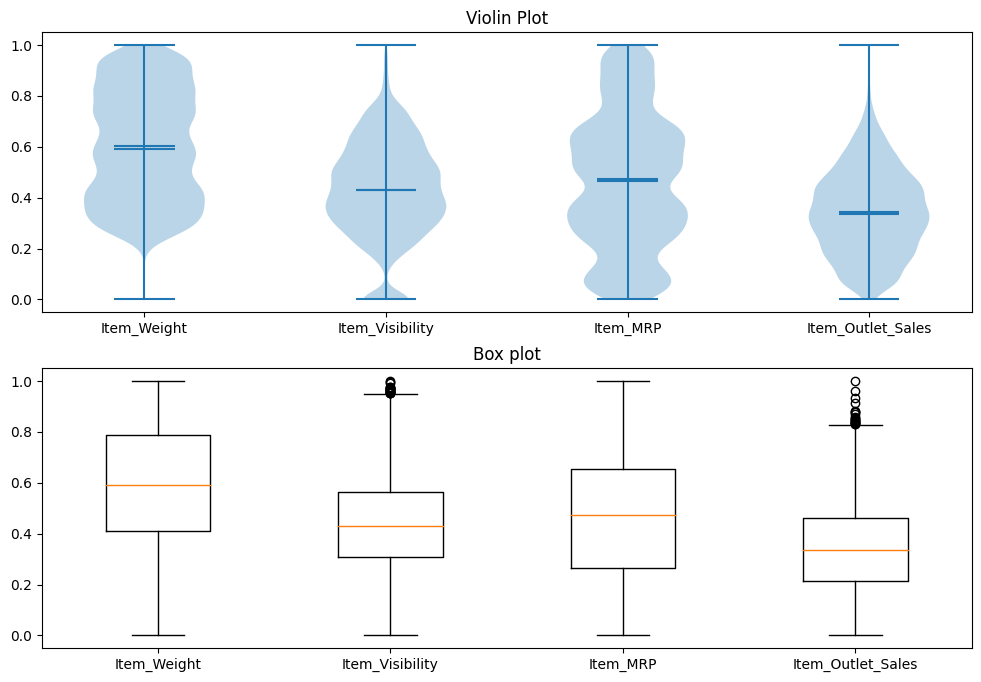

In [41]:
scaler = MinMaxScaler()
train_to_plot_num = scaler.fit_transform(train_to_plot.loc[:, columnas_numericas])
train_to_plot_num = pd.DataFrame(data=train_to_plot_num, columns = columnas_numericas)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))


axs[0].violinplot(train_to_plot_num.astype('float64'),
                    showmeans=True,
                    showmedians=True)
axs[0].set_title('Violin Plot')
axs[0].set_xticks(range(1, len(columnas_numericas) + 1))
axs[0].set_xticklabels(columnas_numericas)

# plot box plot
axs[1].boxplot(train_to_plot_num.astype('float64'))
axs[1].set_title('Box plot')
axs[1].set_label(columnas_numericas)
axs[1].set_xticks(range(1, len(columnas_numericas) + 1))
axs[1].set_xticklabels(columnas_numericas)

plt.show()

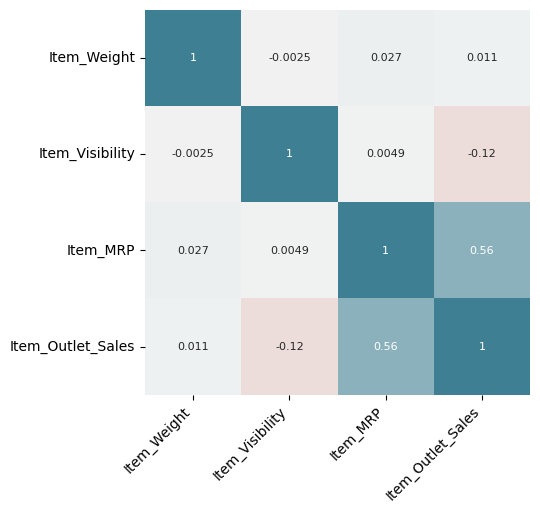

In [42]:
# Matriz de correlacion de variables
matriz_correlacion = train_to_plot.loc[:, columnas_numericas].corr()
# Etiquetas
labs = train_to_plot.loc[:, columnas_numericas].columns
# Mapa de calor
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    matriz_correlacion,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

La mayor relacion linear encontrada se da entre las variables Item_Outlet_Sales y Item_Visibility.

A pesar de los esfuerzos por normalizar la variable de Item_Visibility, no se encuentra ninguna relacion entre estas dos variables.

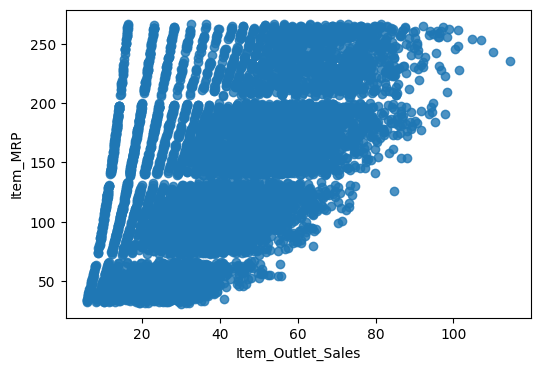

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=train_to_plot.Item_Outlet_Sales, y=train_to_plot.Item_MRP, alpha= 0.8)
ax.set_xlabel('Item_Outlet_Sales')
ax.set_ylabel('Item_MRP');

In [44]:
train_to_plot.Item_MRP.describe

<bound method NDFrame.describe of 0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8518    214.5218
8519    108.1570
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 8523, dtype: float64>

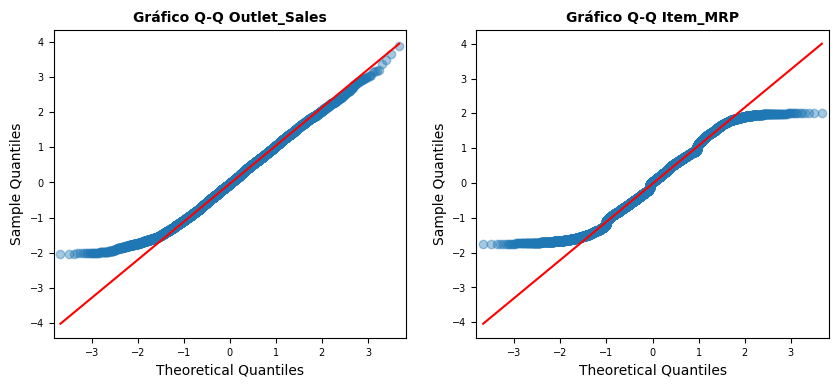

In [45]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sm.qqplot(
    train_to_plot.Item_Outlet_Sales,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[0]
)
axs[0].set_title('Gráfico Q-Q Outlet_Sales', fontsize = 10, fontweight = "bold")
axs[0].tick_params(labelsize = 7)

sm.qqplot(
    train_to_plot.Item_MRP,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[1]
)
axs[1].set_title('Gráfico Q-Q Item_MRP', fontsize = 10, fontweight = "bold")
axs[1].tick_params(labelsize = 7)

El grafico Q-Q nos muestra que ninguna de las dos variables tiene una distribucion normal perfecta (la variable Item_MRP tiene una distribucion muy diferente a la normal).
Los metodos de correlacion de Pearson parten de la base o el requerimiento de que las variables a correlacionar deben ser normales. Y en este caso ninguna lo es. Esto puede explicar probablemente la poca correlacion que hay entre las variables. Y el resultado del mapa de correlaciones con Heatmap probablemente tenga un gran porcentaje de "azar" en su resultado.

No se encuentran mucha correlacion lineal entre las variables numericas. Si es interesante ver que existe alguna relacion entre el valor a predecir y las otras variables segun algunos limites que toman los valores.

Voy a categorizar la variable Item_Outlet_Sales, es decir, la variable a predecir. La categorizo en 4 grupos dependiendo de los valores de los rangos intercuartilicos que arrojan los analisis estadisticos.

Luego de categorizarlo voy a poder hacer comparaciones y analisis estadisticos con otras variables categoricas.

Tambien me va a permitir hacer un analisis mas extenso de las variables continuas con respecto a la variable a predecir categorizada.

In [46]:
columnas_categoricas = [['Item_Fat_Content',
       'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]

columnas_continuas = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

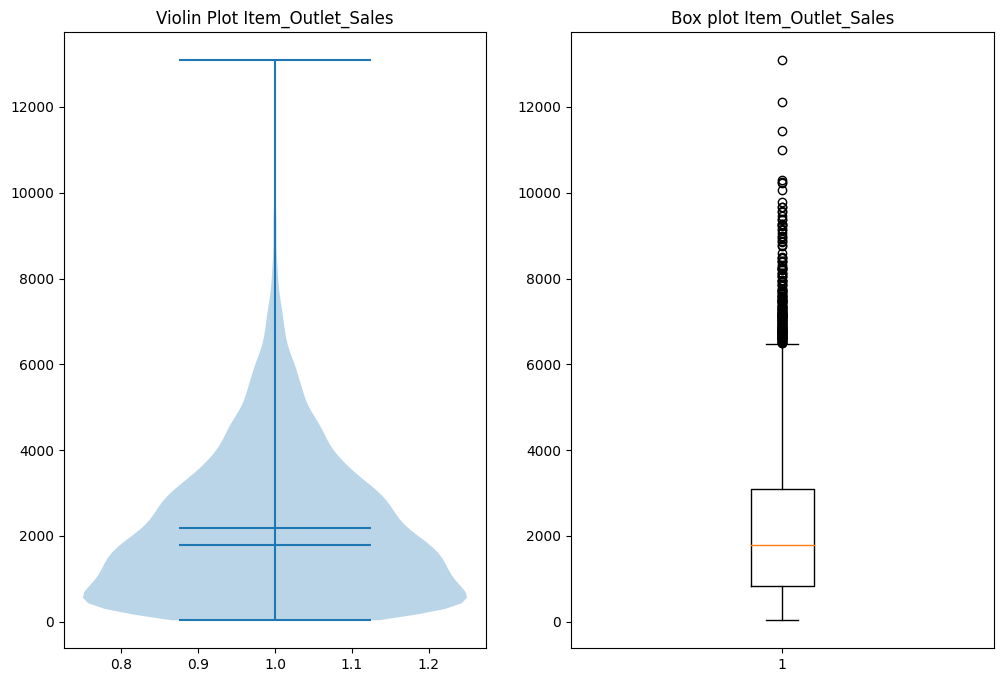

In [47]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))


axs[0].violinplot(train.Item_Outlet_Sales.astype('float64'),
                    showmeans=True,
                    showmedians=True)
axs[0].set_title('Violin Plot Item_Outlet_Sales')


# plot box plot
axs[1].boxplot(train.Item_Outlet_Sales.astype('float64'))
axs[1].set_title('Box plot Item_Outlet_Sales')

plt.show()

In [48]:
train_to_plot = copy.deepcopy(train)

In [49]:
train_to_plot.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [50]:
train_to_plot = train_to_plot.assign(Item_Outlet_Sales_Rango = None)

pc25 = 834.247400
pc50 = 1794.331000
pc75 = 3101.296400

Q1 = train_to_plot.loc[train_to_plot.Item_Outlet_Sales <= pc25, 'Item_Outlet_Sales'].index
Q4 = train_to_plot.loc[train_to_plot.Item_Outlet_Sales >= pc75, 'Item_Outlet_Sales'].index

condQ2 = (train_to_plot['Item_Outlet_Sales'] > pc25) & (train_to_plot['Item_Outlet_Sales'] < pc50)
condQ3 = (train_to_plot['Item_Outlet_Sales'] >= pc50) & (train_to_plot['Item_Outlet_Sales'] < pc75)

Q2 = train_to_plot.loc[condQ2].index
Q3 = train_to_plot.loc[condQ3].index

train_to_plot.Item_Outlet_Sales_Rango[Q1] = 'Very Low'
train_to_plot.Item_Outlet_Sales_Rango[Q2] = 'Low'
train_to_plot.Item_Outlet_Sales_Rango[Q3] = 'High'
train_to_plot.Item_Outlet_Sales_Rango[Q4] = 'Very High'


<ipython-input-50-5e9031af2ae1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_to_plot.Item_Outlet_Sales_Rango[Q1] = 'Very Low'
<ipython-input-50-5e9031af2ae1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_to_plot.Item_Outlet_Sales_Rango[Q2] = 'Low'
<ipython-input-50-5e9031af2ae1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_to_plot.Item_Outlet_Sales_Rango[Q3] = 'High'
<ipython-input-50-5e9031af2ae1>:19: S

Vemos que (logicamente) cada categoria tiene casi la misma cantidad de valores.

In [51]:
train_to_plot.Item_Outlet_Sales_Rango.value_counts()

High         2134
Very High    2132
Very Low     2131
Low          2126
Name: Item_Outlet_Sales_Rango, dtype: int64

Outlet_Size             High      Medium       Small
Outlet_Type                                         
Grocery Store       0.000000    0.000000  100.000000
Supermarket Type1  16.711494   49.937242   33.351264
Supermarket Type2   0.000000  100.000000    0.000000
Supermarket Type3   0.000000  100.000000    0.000000
__________________________________________________


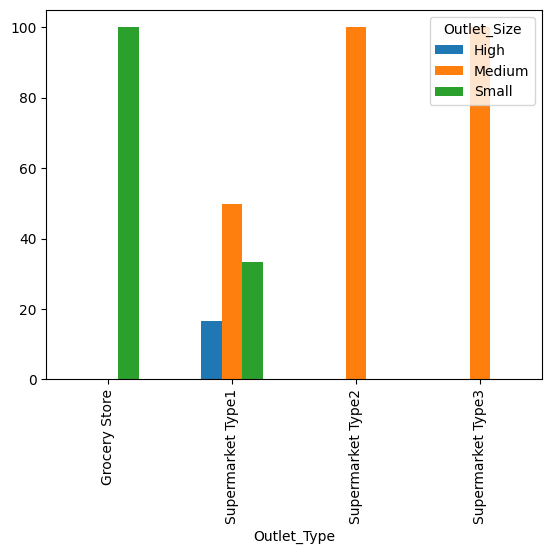

In [52]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Outlet_Type'], columns=train_to_plot['Outlet_Size']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print("_"*50)
plot = pd.crosstab(index=train_to_plot['Outlet_Type'],
            columns=train_to_plot['Outlet_Size']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=1).plot(kind='bar', stacked=False)

Curiosamente, los supermercados tipo 2 y tipo 3 son siempre medianos.

Como habiamos visto a la hora de hacer el OHE, las Grocery Stores son siempre pequenas.

Outlet_Size                High     Medium      Small
Outlet_Location_Type                                 
Tier 1                 0.000000  38.944724  61.055276
Tier 2                 0.000000  66.606822  33.393178
Tier 3                27.820896  55.611940  16.567164
__________________________________________________


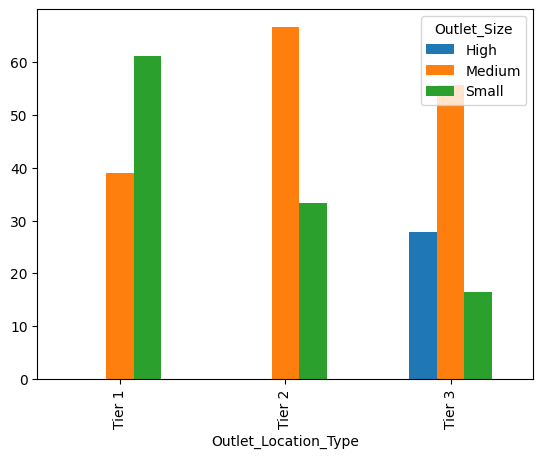

In [53]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Outlet_Location_Type'], columns=train_to_plot['Outlet_Size']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print("_"*50)
plot = pd.crosstab(index=train_to_plot['Outlet_Location_Type'],
            columns=train_to_plot['Outlet_Size']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=1).plot(kind='bar', stacked=False)

Item_Fat_Content          Low Fat    Regular
Item_Type                                   
Baking Goods            50.771605  49.228395
Breads                  55.776892  44.223108
Breakfast               37.272727  62.727273
Canned                  52.542373  47.457627
Dairy                   61.290323  38.709677
Frozen Foods            52.570093  47.429907
Fruits and Vegetables   51.136364  48.863636
Hard Drinks            100.000000   0.000000
Health and Hygiene     100.000000   0.000000
Household              100.000000   0.000000
Meat                    40.000000  60.000000
Others                 100.000000   0.000000
Seafood                 57.812500  42.187500
Snack Foods             57.666667  42.333333
Soft Drinks             84.044944  15.955056
Starchy Foods           55.405405  44.594595
__________________________________________________


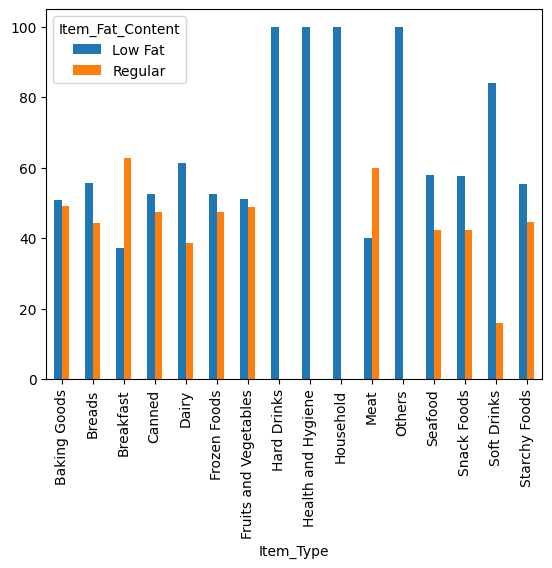

In [54]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Item_Type'], columns=train_to_plot['Item_Fat_Content']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print('_'*50)

plot = pd.crosstab(index=train_to_plot['Item_Type'],
            columns=train_to_plot['Item_Fat_Content']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

Outlet_Size                 High      Medium       Small
Outlet_Establishment_Year                               
1985                         0.0   63.909774   36.090226
1987                       100.0    0.000000    0.000000
1997                         0.0    0.000000  100.000000
1998                         0.0    0.000000  100.000000
1999                         0.0  100.000000    0.000000
2002                         0.0  100.000000    0.000000
2004                         0.0    0.000000  100.000000
2007                         0.0  100.000000    0.000000
2009                         0.0  100.000000    0.000000
__________________________________________________


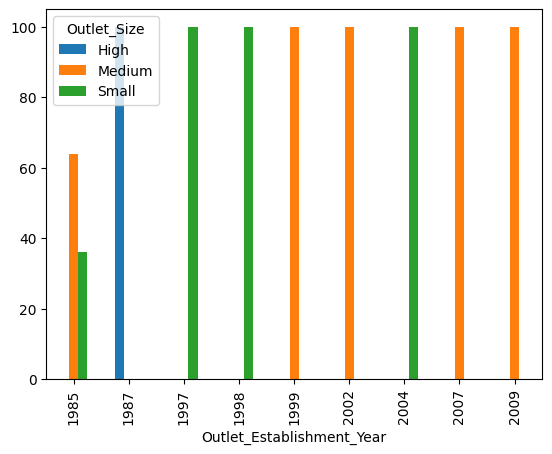

In [55]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Outlet_Establishment_Year'], columns=train_to_plot['Outlet_Size']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print('_'*50)

plot = pd.crosstab(index=train_to_plot['Outlet_Establishment_Year'],
            columns=train_to_plot['Outlet_Size']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

Outlet_Type                Grocery Store  Supermarket Type1  \
Outlet_Establishment_Year                                     
1985                           36.090226                0.0   
1987                            0.000000              100.0   
1997                            0.000000              100.0   
1998                          100.000000                0.0   
1999                            0.000000              100.0   
2002                            0.000000              100.0   
2004                            0.000000              100.0   
2007                            0.000000              100.0   
2009                            0.000000                0.0   

Outlet_Type                Supermarket Type2  Supermarket Type3  
Outlet_Establishment_Year                                        
1985                                     0.0          63.909774  
1987                                     0.0           0.000000  
1997                                     0

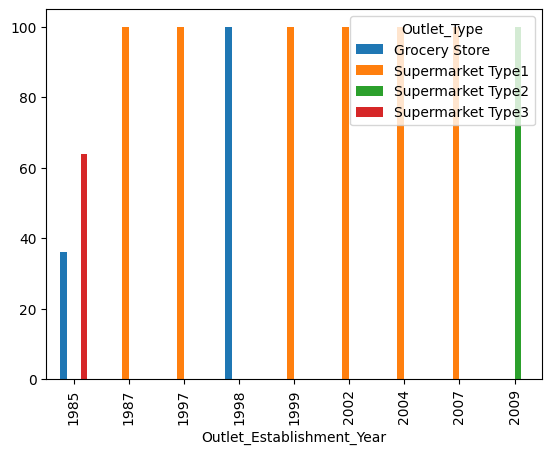

In [56]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Outlet_Establishment_Year'], columns=train_to_plot['Outlet_Type']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print('_'*50)

plot = pd.crosstab(index=train_to_plot['Outlet_Establishment_Year'],
            columns=train_to_plot['Outlet_Type']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

Item_Outlet_Sales_Rango       High        Low  Very High   Very Low
Outlet_Type                                                        
Grocery Store             0.000000   5.632502   0.000000  94.367498
Supermarket Type1        29.836830  28.599606  25.748610  15.814954
Supermarket Type2        26.724138  33.836207  19.073276  20.366379
Supermarket Type3        23.743316  16.684492  55.508021   4.064171
__________________________________________________


<Axes: xlabel='Outlet_Type'>

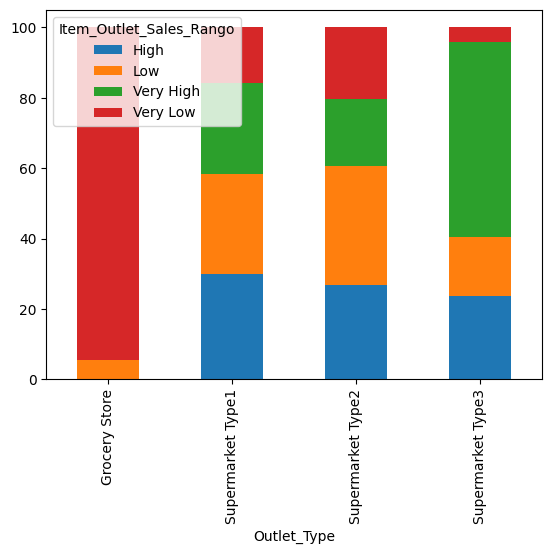

In [57]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Outlet_Type'], columns=train_to_plot['Item_Outlet_Sales_Rango']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print("_"*50)
pd.crosstab(index=train_to_plot['Outlet_Type'],
            columns=train_to_plot['Item_Outlet_Sales_Rango']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=1).plot(kind='bar', stacked=True)

Item_Outlet_Sales_Rango       High        Low  Very High   Very Low
Item_Fat_Content                                                   
Low Fat                  25.122349  25.394236  24.234185  25.249230
Regular                  24.883566  24.118430  26.447106  24.550898
__________________________________________________


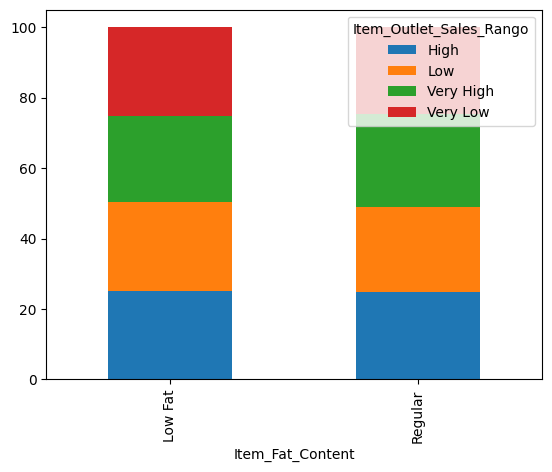

In [58]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Item_Fat_Content'], columns=train_to_plot['Item_Outlet_Sales_Rango']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print("_"*50)
plot = pd.crosstab(index=train_to_plot['Item_Fat_Content'],
            columns=train_to_plot['Item_Outlet_Sales_Rango']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=1).plot(kind='bar', stacked=True)

Item_Outlet_Sales_Rango       High        Low  Very High   Very Low
Item_Type                                                          
Baking Goods             23.456790  27.469136  20.987654  28.086420
Breads                   27.091633  25.099602  26.294821  21.513944
Breakfast                21.818182  21.818182  23.636364  32.727273
Canned                   26.656394  25.577812  25.115562  22.650231
Dairy                    19.941349  26.539589  27.565982  25.953079
Frozen Foods             22.897196  26.752336  24.415888  25.934579
Fruits and Vegetables    23.782468  25.974026  27.191558  23.051948
Hard Drinks              25.700935  24.766355  24.766355  24.766355
Health and Hygiene       27.884615  25.769231  19.230769  27.115385
Household                27.692308  20.879121  26.923077  24.505495
Meat                     27.529412  22.117647  23.294118  27.058824
Others                   28.402367  23.668639  20.710059  27.218935
Seafood                  25.000000  10.937500  3

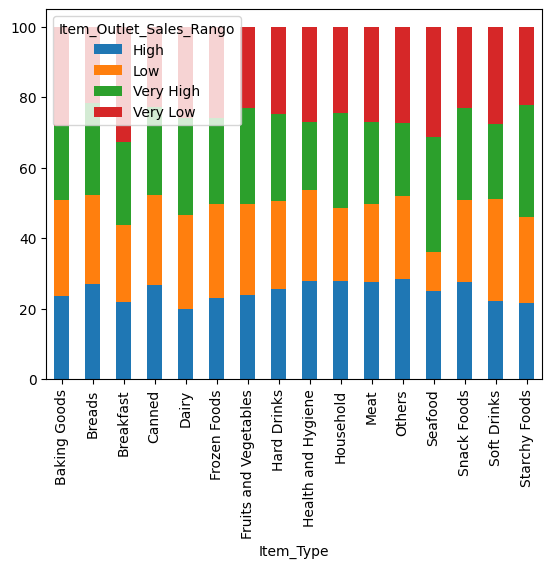

In [59]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Item_Type'], columns=train_to_plot['Item_Outlet_Sales_Rango']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print("_"*50)
plot = pd.crosstab(index=train_to_plot['Item_Type'],
            columns=train_to_plot['Item_Outlet_Sales_Rango']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=1).plot(kind='bar', stacked=True)

Item_Outlet_Sales_Rango       High        Low  Very High   Very Low
Outlet_Size                                                        
High                     29.721030  25.751073  26.394850  18.133047
Medium                   27.775387  28.012048  29.905336  14.307229
Small                    19.232076  19.843697  16.853551  44.070676
__________________________________________________


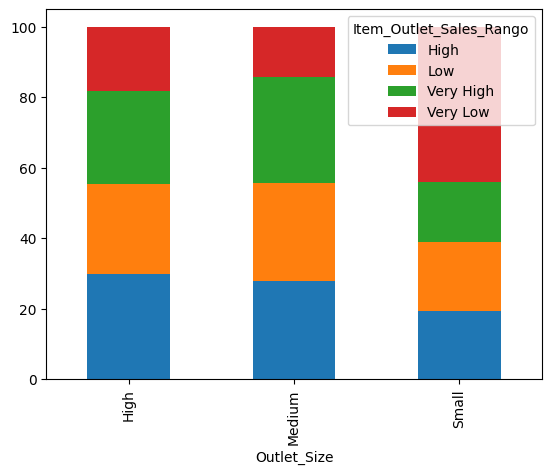

In [60]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Outlet_Size'], columns=train_to_plot['Item_Outlet_Sales_Rango']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print("_"*50)
plot = pd.crosstab(index=train_to_plot['Outlet_Size'],
            columns=train_to_plot['Item_Outlet_Sales_Rango']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=1).plot(kind='bar', stacked=True)

Item_Outlet_Sales_Rango         High        Low  Very High   Very Low
Outlet_Establishment_Year                                            
1985                       15.174299  12.576897  35.475051  36.773753
1987                       29.721030  25.751073  26.394850  18.133047
1997                       29.247312  30.430108  24.838710  15.483871
1998                        0.000000   5.945946   0.000000  94.054054
1999                       27.419355  29.892473  27.634409  15.053763
2002                       28.955867  32.292788  22.174381  16.576964
2004                       31.612903  25.806452  28.494624  14.086022
2007                       32.073434  27.429806  24.946004  15.550756
2009                       26.724138  33.836207  19.073276  20.366379
__________________________________________________


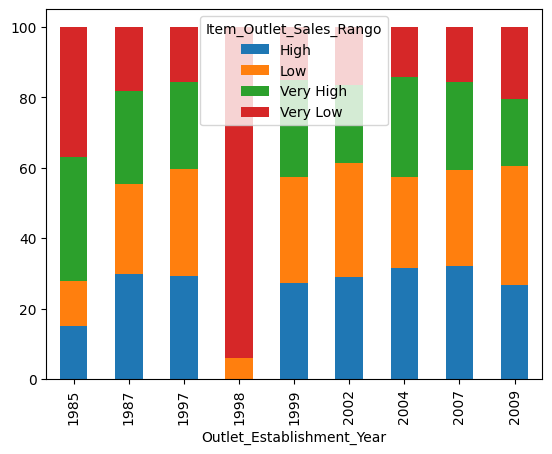

In [61]:
# tabla de contingencia en porcentajes relativos segun tipo y tamano del outlet
print(pd.crosstab(index=train_to_plot['Outlet_Establishment_Year'], columns=train_to_plot['Item_Outlet_Sales_Rango']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1))
print("_"*50)
plot = pd.crosstab(index=train_to_plot['Outlet_Establishment_Year'],
            columns=train_to_plot['Item_Outlet_Sales_Rango']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=1).plot(kind='bar', stacked=True)

Asocio la mayoria de ventas Very Low de los outlets de 1998 al hecho de que en 1998 todos los Outlets fundados fueron Grocery Stores, y como ya vimos, los Grocery Stores destacaban por tener ventas en su gran mayoria de la categoria Very Low.

In [62]:
train_to_plot.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Outlet_Sales_Rango'],
      dtype='object')

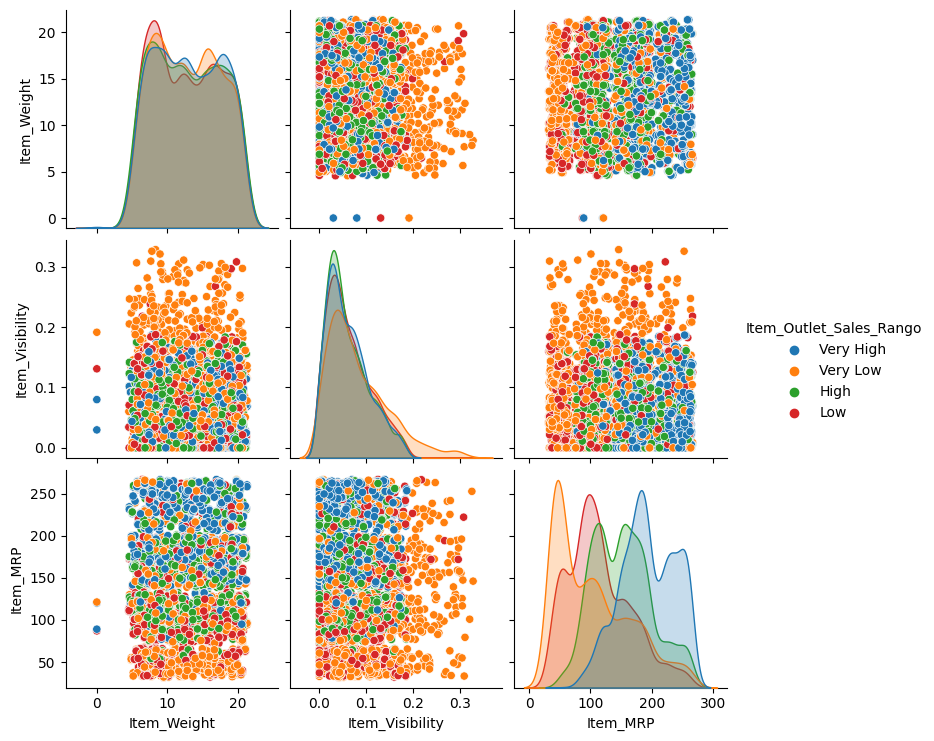

In [63]:
columnas_continuas = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

sns.pairplot(train_to_plot, hue = 'Item_Outlet_Sales_Rango', vars = columnas_continuas)

Curiosamente, cuando analizamos las variables continuas teniendo en cuenta las cuatro categorias generadas en los rangos intercuartilicos, vemos que se genera una agrupacion de los datos en casi todas las variables.

Destaca la agrupacion de los datos Very Low, y la separacion entre las distribuciones de Item_MRP teniendo en cuenta la variable de prediccion.

Si recordamos, previamente habiamos visto que se generaba cierta correlacion entre las variables Item_MRP y la variable a predecir. Es curioso que habiendo llegado a la conclusion de que el resultado era erroneo por no cumplir el requisito de tener ambas variables una distribucion normal, volvemos a ver que encontramos cierta agrupacion o relacion entre ambas variables.

# PCA y MCA

## PCA y analisis de importancia de las variables

Al tener variables categoricas y continuas en mi DataSet, voy a hacer el analisis de componentes principales por separado.

Para analizar las variables continuas, uso el PCA.

Para analizar las variables categoricas, uso MCA. Esta es una variante del PCA para el analisis de variables categoricas, de donde se extrae informacion muy similar a la del PCA.

In [64]:
columnas_continuas = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [65]:
train_to_model.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment_Year_2007',
       'Outlet_Establishment_Year_2009', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier

In [66]:
# Genero dos DF con los datos categoricos y numericos por separado.
train_PCA = train.loc[:, columnas_continuas]
train_MCA = train_to_model.drop(columnas_continuas, axis = 1).drop(['Item_Outlet_Sales'], axis = 1)

In [67]:
print(train_PCA.columns)
print(train_MCA.columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')
Index(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment_Year_2007',
       'Outlet_Establishment_Year_2009', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',

##MCA

In [68]:
!pip install prince
from prince import MCA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 7.7 MB/s eta 0:00:00


In [69]:
# Inicializar y ajustar el modelo MCA
mca = MCA(
    n_components=len(train_MCA.columns),
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42,
    one_hot=False
)

mca.fit(train_MCA)


MCA(n_components=37, one_hot=False, random_state=42)

In [70]:
summaryMCA = pd.DataFrame(mca.eigenvalues_summary)
summaryMCA

summaryMCA['% of variance'] = summaryMCA['% of variance'].apply(lambda x: float(x.replace('%', '')))
summaryMCA['% of variance (cumulative)'] = summaryMCA['% of variance (cumulative)'].apply(lambda x: float(x.replace('%', '')))


In [71]:
summaryMCA.head()

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.457,8.85,8.85
1,0.413,8.00,16.85
2,0.372,7.19,24.04
3,0.307,5.95,29.99
4,0.302,5.85,35.83


In [72]:
column_coordinates = mca.column_coordinates(train_MCA)

# Mostrar las coordenadas de las columnas
column_coordinates.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
Item_Fat_Content_Low Fat,-0.001668,0.000072,0.007527,0.005899,0.017478,-0.621068,-0.029062,-0.001738,-0.010650,0.000798,...,0.060283,0.051175,0.058458,0.027407,0.000671,-0.0075,0.010654,-0.002442,0.123198,0.565358
Item_Fat_Content_Regular,0.003062,-0.000133,-0.013815,-0.010827,-0.032077,1.139865,0.053338,0.003189,0.019547,-0.001465,...,0.060283,0.051175,0.058458,0.027407,0.000671,-0.0075,0.010654,-0.002442,0.123198,0.565358
Item_Type_Baking Goods,-0.018693,0.021431,0.023716,-0.005851,-0.007858,0.585311,0.018854,-0.463780,1.027207,-0.130705,...,0.060283,0.051175,0.058458,0.027407,0.000671,-0.0075,0.010654,-0.002442,0.123198,0.565358
Item_Type_Breads,0.014153,0.020339,-0.059633,0.092005,0.052054,0.373854,-0.068388,1.582253,1.480142,-1.456949,...,0.060283,0.051175,0.058458,0.027407,0.000671,-0.0075,0.010654,-0.002442,0.123198,0.565358
Item_Type_Breakfast,0.058620,0.154876,0.024680,-0.014983,-0.010726,1.141171,0.453574,-0.351173,-0.980882,3.033067,...,0.060283,0.051175,0.058458,0.027407,0.000671,-0.0075,0.010654,-0.002442,0.123198,0.565358


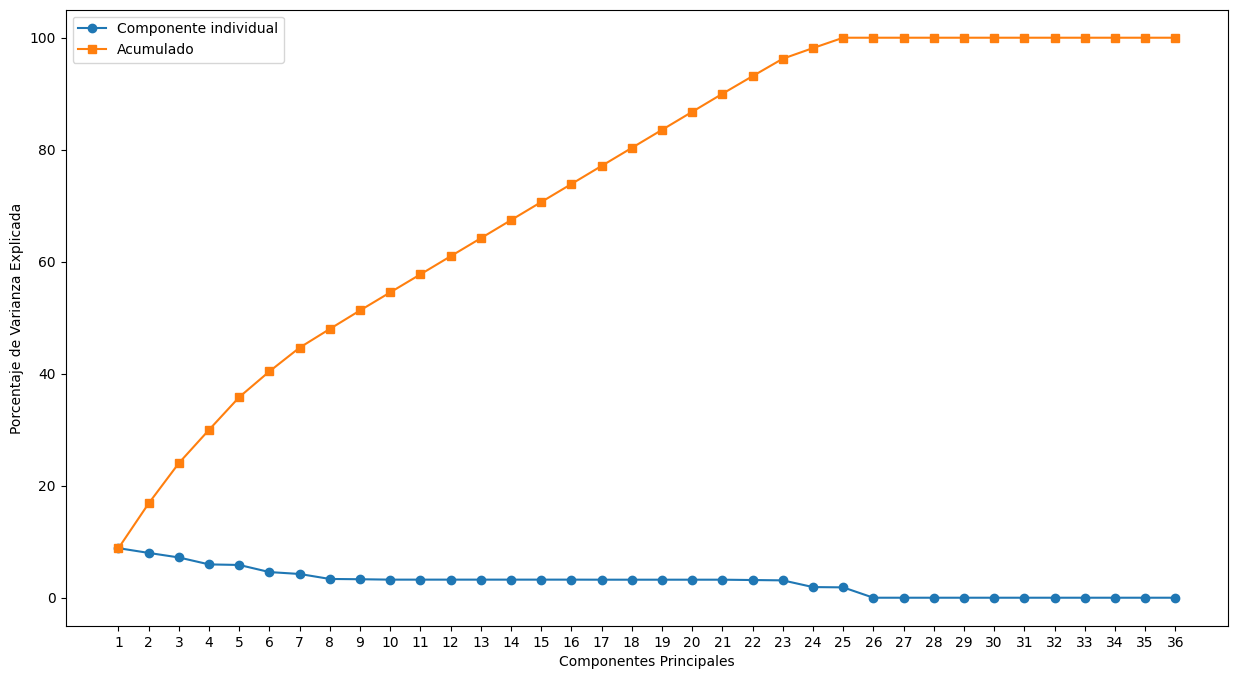

In [73]:
plt.figure(figsize=(15, 8))

plt.plot(range(1, len(summaryMCA) + 1), summaryMCA.loc[:, '% of variance'], '-o', label='Componente individual')
plt.plot(range(1, len(summaryMCA) + 1), summaryMCA.loc[:, '% of variance (cumulative)'], '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.xticks(range(1, len(summaryMCA) + 1))
plt.legend(loc=2)

plt.show()


Viendo el grafico notamos que hasta la dimension numero 25 hay un incremento continuo en cuanto a la explicacion de cada dimension en la totalidad de las variables.

A partir de la 25, la explicacion es minima. Es por esto que para nuestro analisis voy a tomar solamente las 25 primeras componentes que arroja como resultado el MCA.

In [74]:
mca = MCA(n_components=25)  # Ajusta el número de componentes según lo que hayas utilizado
mca.fit(train_MCA)

MCA(n_components=25)

In [75]:
MCA_proyectado = mca.transform(train_MCA)

In [76]:
MCA_proyectado.shape

(8523, 25)

In [77]:
MCA_proyectado.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.169487,-0.084020,-0.142221,0.051950,0.506098,-0.012419,0.210401,0.072716,-0.039723,-0.156599,...,-0.127182,0.021775,-0.010833,-0.067605,0.014946,-0.048072,-0.034483,-0.030459,0.093572,-0.075662
1,0.556831,-0.244903,-0.093265,0.200831,-0.068928,0.491856,-0.079270,-0.005029,0.042900,-0.004132,...,0.407176,0.487666,-0.167853,-0.147283,-0.036875,0.006731,0.003628,-0.026164,-0.286025,0.072496
2,-0.159172,-0.078545,-0.156118,0.118607,0.468557,-0.026196,0.212462,0.084972,-0.045931,-0.191155,...,0.489308,-0.355283,0.188651,-0.113844,0.013240,-0.119390,-0.064158,-0.039155,0.270439,-0.075780
3,0.244110,0.584956,-0.029034,0.170801,-0.478355,0.082223,0.468628,-0.291097,-0.175747,-0.135424,...,-0.043294,0.025872,0.003778,-0.006186,-0.020316,-0.006340,-0.035460,-0.003816,-0.069788,-0.203061
4,0.104177,0.014051,0.766855,-0.228784,0.187318,-0.079773,0.014254,-0.024541,0.001117,-0.014146,...,0.001806,-0.035148,-0.061488,-0.036592,-0.004092,-0.004341,0.011737,0.003283,-0.154674,0.073219


Si bien podemos decir que en la primera dimension se explica relativamente gran parte de la varianza, podemos notar mas importancia en cuanto a la poca importancia de las ultimas componentes.

Viendo aquellas variables donde encontramos mayor explicacion de la varianza, o mayor importancia en la dimension generada por el MCA, probablemente podamos llegar a conclusiones acerca de las variables que tenemos en el dataset y como impactan sobre nuestro analisis.

In [78]:
for i in range(0,25):
  print(column_coordinates[i].idxmax())

Outlet_Establishment_Year_2009
Outlet_Establishment_Year_1998
Outlet_Size_3.0
Outlet_Type_Supermarket Type3
Outlet_Establishment_Year_1998
Item_Type_Breakfast
Outlet_Establishment_Year_1998
Item_Type_Seafood
Item_Type_Others
Item_Type_Breakfast
Item_Type_Seafood
Item_Type_Seafood
Item_Type_Starchy Foods
Item_Type_Seafood
Item_Type_Breads
Item_Type_Breakfast
Item_Type_Seafood
Item_Type_Hard Drinks
Item_Type_Others
Item_Type_Meat
Item_Type_Breakfast
Item_Type_Others
Item_Type_Seafood
Outlet_Type_Grocery Store
Item_Type_Hard Drinks


Las variables que no aparecen como mas importantes dentro de las 25 primeros componentes principales de las variables categoricas son:
'Item_Fat_Content' y 'Outlet_Location_Type'.

Si bien no podemos sacar ninguna conclusion final sobre estas, si podemos tenerlo en cuenta para futuros analisis.

In [79]:
summaryMCA.loc[0:25, '% of variance']

component
0     8.85
1     8.00
2     7.19
3     5.95
4     5.85
5     4.58
6     4.24
7     3.35
8     3.30
9     3.23
10    3.23
11    3.23
12    3.23
13    3.23
14    3.23
15    3.23
16    3.22
17    3.22
18    3.22
19    3.22
20    3.22
21    3.16
22    3.10
23    1.90
24    1.85
25    0.00
Name: % of variance, dtype: float64

## PCA

In [80]:
from sklearn.decomposition import PCA

Primero hago un analisis estadistico de las variables continuas a analizar, tanto sin normalizar como normalizadas.

La normalizacion la llevo a cabo con StandardScale de Scikit.

In [81]:
print("Media de las variables: ")
print(train_PCA.mean(axis=0))

print('\n')

print("Varianza de las variables: ")
print(train_PCA.var(axis=0))

Media de las variables: 
Item_Weight         12.869378
Item_Visibility      0.066132
Item_MRP           140.992782
dtype: float64


Varianza de las variables: 
Item_Weight          21.653873
Item_Visibility       0.002662
Item_MRP           3878.183909
dtype: float64


In [82]:
std_sclr = StandardScaler()
train_PCA_std = pd.DataFrame(std_sclr.fit_transform(train_PCA), index=train_PCA.index, columns=train_PCA.columns)

In [83]:
print("Media de las variables: ")
print(train_PCA_std.mean(axis=0))

print('\n')

# Observamos nuevamente la varianza de las variables:
print("Varianza de las variables: ")
print(train_PCA_std.var(axis=0))

Media de las variables: 
Item_Weight        4.485181e-16
Item_Visibility   -1.092117e-16
Item_MRP          -1.579818e-16
dtype: float64


Varianza de las variables: 
Item_Weight        1.000117
Item_Visibility    1.000117
Item_MRP           1.000117
dtype: float64


Comprobada la estandarizacion de los datos, genero el PCA del modelo.

In [84]:
pca_train_PCA = PCA()
pca_train_PCA.fit(train_PCA_std)

PCA()

Miro el valor absoluto del loading para decidir cuál es el que más contribuye. Cada variable explica mucho de una componente. Es muy probable que no podamos excluir ninguna variable en este caso.

Sigo analizando igualmente.

In [85]:
pca_loadings = pd.DataFrame(pca_train_PCA.components_.T, index=train_PCA.columns, columns=['PC1', 'PC2', 'PC3'])
pca_loadings

,PC1,PC2,PC3
Item_Weight,-0.701269,0.034318,0.712071
Item_Visibility,0.276272,0.933869,0.227073
Item_MRP,-0.657188,0.355964,-0.664374


###Ortonormalidad de los componentes principales

In [86]:
pca_loadings.T.dot(pca_loadings)

,PC1,PC2,PC3
PC1,1.000000e+00,-2.634508e-16,-8.658640e-17
PC2,-2.634508e-16,1.000000e+00,-8.841717e-18
PC3,-8.658640e-17,-8.841717e-18,1.000000e+00


Luego de verificar la ortonormalidad de las componentes principales de cada dimension, podemos confirmar que el PCA es fiable, y seguir con el analisis.

In [87]:
train_PCA_pca = pd.DataFrame(pca_train_PCA.fit_transform(train_PCA_std), columns=['PC1', 'PC2', 'PC3'],\
                      index=train_PCA_std.index)
train_PCA_pca.head()

,PC1,PC2,PC3
0,-0.878651,-0.310831,-1.927618
1,1.775024,-1.429350,-0.280412
2,-0.968849,-0.855909,0.484670
3,-1.741978,-0.915350,0.239212
4,1.159141,-1.724120,0.035704


In [88]:
print("Media de los CP: ")
print(train_PCA_pca.mean(axis=0))

print('\n')

# Observamos la varianza de las variables:
print("Varianza de los CPs: ")
print(train_PCA_pca.var(axis=0))

Media de los CP: 
PC1   -1.375567e-17
PC2   -2.709450e-17
PC3   -7.503091e-18
dtype: float64


Varianza de los CPs: 
PC1    1.029155
PC2    0.999241
PC3    0.971956
dtype: float64


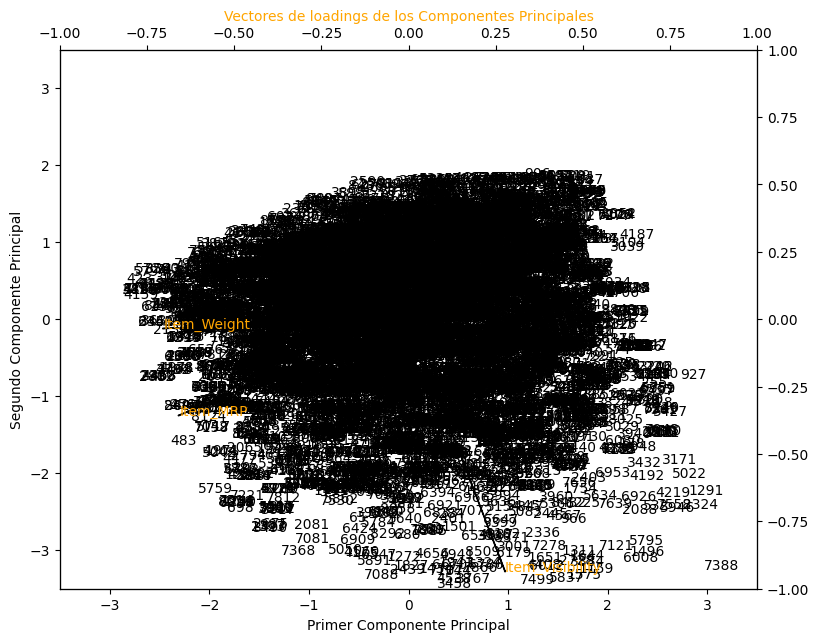

In [89]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Ploteamos a los Estados en el espacio de los Componentes Principales 1 y 2
for i in train_PCA_pca.index:
    ax1.annotate(i, (train_PCA_pca.PC1.loc[i], -train_PCA_pca.PC2.loc[i]), ha='center')

# Ploteamos las líneas de referencia
#ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
#ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('Primer Componente Principal')
ax1.set_ylabel('Segundo Componente Principal')

# Creamos ejes secundarios
ax2 = ax1.twinx().twiny()

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Vectores de loadings de los Componentes Principales', color='orange')

# Ploteamos a las variables originales en relación a los Componentes Principales 1 y 2
for i in pca_loadings[['PC1', 'PC2']].index:
    ax2.annotate(i, (pca_loadings.PC1.loc[i], -pca_loadings.PC2.loc[i]), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.PC1[0], -pca_loadings.PC2[0])
ax2.arrow(0,0,pca_loadings.PC1[1], -pca_loadings.PC2[1])
ax2.arrow(0,0,pca_loadings.PC1[2], -pca_loadings.PC2[2])

In [90]:
pca_train_PCA.explained_variance_

array([1.02915491, 0.999241  , 0.97195612])

In [91]:
pca_train_PCA.explained_variance_ratio_

array([0.34301139, 0.33304125, 0.32394736])

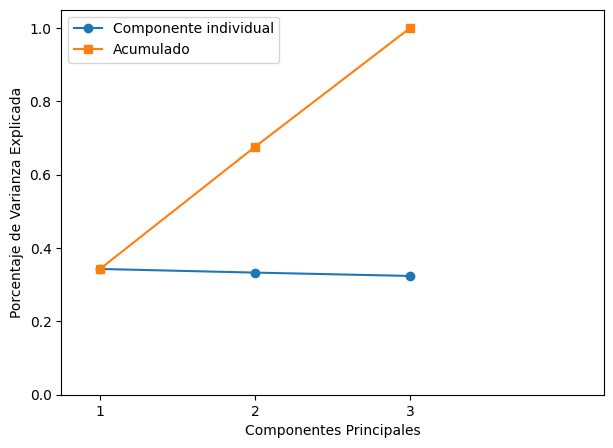

In [92]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3], pca_train_PCA.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot([1,2,3], np.cumsum(pca_train_PCA.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3])
plt.legend(loc=2);

Claramente no podemos eliminar ninguna variable o depender de la explicacion que proporcionan los PCA en las variables continuas.

Cada variable explica practicamente igual la informacion contenida.

## Union de PCA y MCA nuevamente

In [93]:
train_PCA.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

In [94]:
train_to_model = pd.concat([train_PCA, MCA_proyectado], axis=1)

In [95]:
train_to_model = pd.concat([train_to_model, train.Item_Outlet_Sales], axis=1)

# Transformacion de Datos

## Busco llegar a distribuciones mas cercanas a normales.

Para ello voy a normalizar y estandarizar los datos.



In [96]:
train_to_model.head()

,Item_Weight,Item_Visibility,Item_MRP,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,24,Item_Outlet_Sales
0,9.30,0.016047,249.8092,-0.169487,-0.084020,-0.142221,0.051950,0.506098,-0.012419,0.210401,...,0.021775,-0.010833,-0.067605,0.014946,-0.048072,-0.034483,-0.030459,0.093572,-0.075662,3735.1380
1,5.92,0.019278,48.2692,0.556831,-0.244903,-0.093265,0.200831,-0.068928,0.491856,-0.079270,...,0.487666,-0.167853,-0.147283,-0.036875,0.006731,0.003628,-0.026164,-0.286025,0.072496,443.4228
2,17.50,0.016760,141.6180,-0.159172,-0.078545,-0.156118,0.118607,0.468557,-0.026196,0.212462,...,-0.355283,0.188651,-0.113844,0.013240,-0.119390,-0.064158,-0.039155,0.270439,-0.075780,2097.2700
3,19.20,0.000000,182.0950,0.244110,0.584956,-0.029034,0.170801,-0.478355,0.082223,0.468628,...,0.025872,0.003778,-0.006186,-0.020316,-0.006340,-0.035460,-0.003816,-0.069788,-0.203061,732.3800
4,8.93,0.000000,53.8614,0.104177,0.014051,0.766855,-0.228784,0.187318,-0.079773,0.014254,...,-0.035148,-0.061488,-0.036592,-0.004092,-0.004341,0.011737,0.003283,-0.154674,0.073219,994.7052


In [97]:
train_to_model.iloc[:, [1,2,3,4,len(train_to_model.columns)-1]].describe()

,Item_Visibility,Item_MRP,0,1,Item_Outlet_Sales
count,8523.000000,8523.000000,8.523000e+03,8.523000e+03,8523.000000
mean,0.066132,140.992782,-5.051560e-17,2.209244e-17,2181.288914
std,0.051598,62.275067,3.265061e-01,3.034259e-01,1706.499616
min,0.000000,31.290000,-3.887012e-01,-3.821890e-01,33.290000
25%,0.026989,93.826500,-2.307626e-01,-2.438206e-01,834.247400
50%,0.053931,143.012800,-1.678898e-01,-2.641880e-02,1794.331000
75%,0.094585,185.643700,2.403622e-01,7.483653e-02,3101.296400
max,0.328391,266.888400,5.705420e-01,6.000891e-01,13086.964800


Las columnas provenientes del MCA no las voy a transformar, solamente normalizar para mantener la distribucion, modificando que los valores se encuentren siempre entre 0 y 1

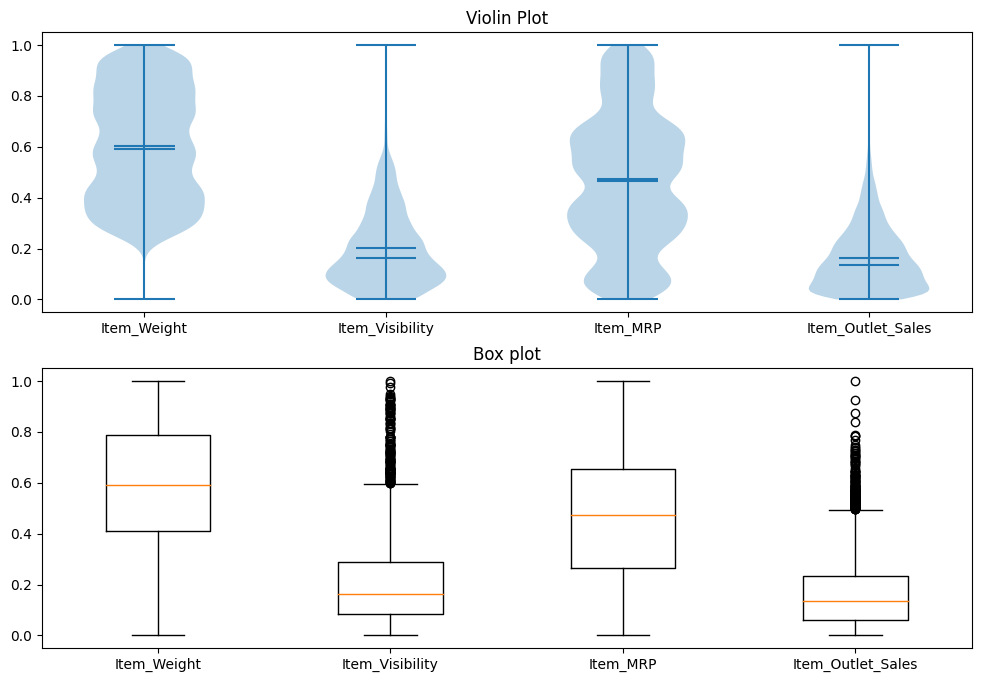

In [98]:
columnas_a_norm = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']


scaler = MinMaxScaler()
train_to_plot_num = scaler.fit_transform(train_to_model.loc[:, columnas_a_norm])
train_to_plot_num = pd.DataFrame(data=train_to_plot_num, columns = columnas_a_norm)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))


axs[0].violinplot(train_to_plot_num.astype('float64'),
                    showmeans=True,
                    showmedians=True)
axs[0].set_title('Violin Plot')
axs[0].set_xticks(range(1, len(columnas_a_norm) + 1))
axs[0].set_xticklabels(columnas_a_norm)

# plot box plot
axs[1].boxplot(train_to_plot_num.astype('float64'))
axs[1].set_title('Box plot')
axs[1].set_label(columnas_a_norm)
axs[1].set_xticks(range(1, len(columnas_a_norm) + 1))
axs[1].set_xticklabels(columnas_a_norm)

plt.show()

In [99]:

# Transformacion logaritmica sumando 1 para evitar tener numeros negativos
train_to_model.Item_Visibility = np.log2(train_to_model.Item_Visibility + 1)**(1/2)
train_to_model.Item_Outlet_Sales = (train_to_model.Item_Outlet_Sales)**(1/2)

In [100]:
train_to_model.iloc[:, [1,2,3,4,len(train_to_model.columns)-1]].describe()

,Item_Visibility,Item_MRP,0,1,Item_Outlet_Sales
count,8523.000000,8523.000000,8.523000e+03,8.523000e+03,8523.000000
mean,0.274870,140.992782,-5.051560e-17,2.209244e-17,42.944777
std,0.123290,62.275067,3.265061e-01,3.034259e-01,18.359591
min,0.000000,31.290000,-3.887012e-01,-3.821890e-01,5.769749
25%,0.196014,93.826500,-2.307626e-01,-2.438206e-01,28.883339
50%,0.275282,143.012800,-1.678898e-01,-2.641880e-02,42.359544
75%,0.361088,185.643700,2.403622e-01,7.483653e-02,55.689284
max,0.640062,266.888400,5.705420e-01,6.000891e-01,114.398273


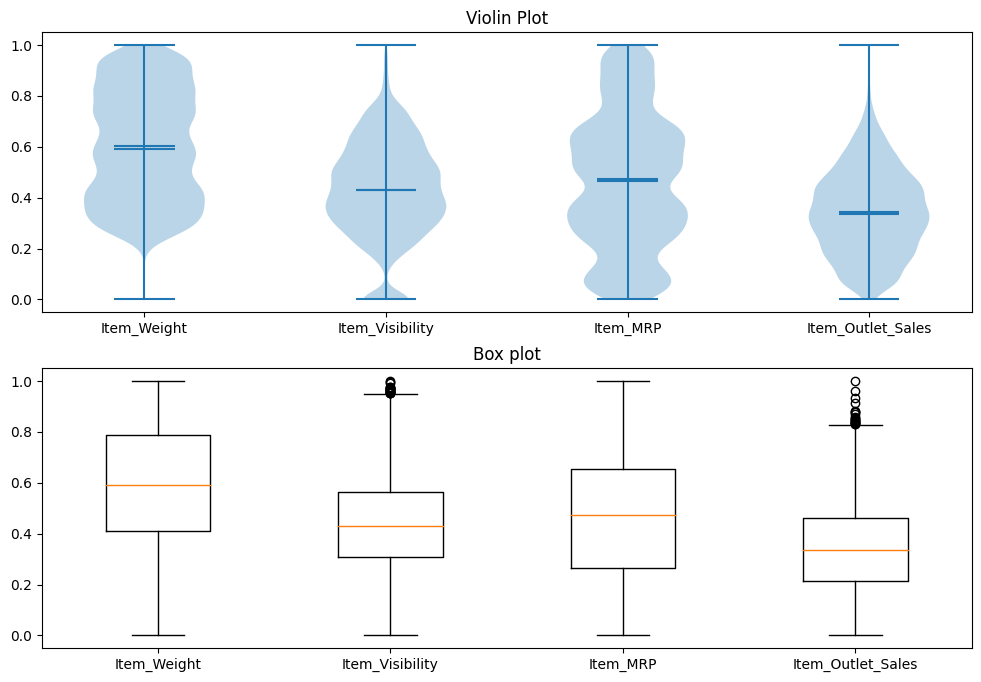

In [101]:
scaler = MinMaxScaler()
train_to_plot_num = scaler.fit_transform(train_to_model.loc[:, columnas_a_norm])
train_to_plot_num = pd.DataFrame(data=train_to_plot_num, columns = columnas_a_norm)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))


axs[0].violinplot(train_to_plot_num.astype('float64'),
                    showmeans=True,
                    showmedians=True)
axs[0].set_title('Violin Plot')
axs[0].set_xticks(range(1, len(columnas_a_norm) + 1))
axs[0].set_xticklabels(columnas_a_norm)

# plot box plot
axs[1].boxplot(train_to_plot_num.astype('float64'))
axs[1].set_title('Box plot')
axs[1].set_label(columnas_a_norm)
axs[1].set_xticks(range(1, len(columnas_a_norm) + 1))
axs[1].set_xticklabels(columnas_a_norm)

plt.show()

Vemos que dentro de lo posible, logramos algo mucho mas parecido a una distribucion normal a lo que teniamos antes.

Ahora vamos a definir el normalizado y tambien estandarizar

In [102]:
nombre_columnas = train_to_model.columns.tolist()

# Crear un diccionario de mapeo para cambiar los nombres a cadenas de texto
num_to_str = {col: str(col) for col in nombre_columnas}
train_to_model = train_to_model.rename(columns= num_to_str)



In [103]:
# Estandarizacion solo de las columnas NO provenientes del MCA
std_sclr = StandardScaler()
for i in columnas_a_norm:
  train_to_model[i] = std_sclr.fit_transform(train_to_model[i].values.reshape(-1, 1))

In [104]:
train_to_model.iloc[:, [1,2,3,4,len(train_to_model.columns)-1]].describe()

,Item_Visibility,Item_MRP,0,1,Item_Outlet_Sales
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,5.869085e-16,-1.579818e-16,-5.051560e-17,2.209244e-17,-1.896615e-16
std,1.000059e+00,1.000059e+00,3.265061e-01,3.034259e-01,1.000059e+00
min,-2.229594e+00,-1.761688e+00,-3.887012e-01,-3.821890e-01,-2.024948e+00
25%,-6.396375e-01,-7.574307e-01,-2.307626e-01,-2.438206e-01,-7.659355e-01
50%,3.345328e-03,3.243893e-02,-1.678898e-01,-2.641880e-02,-3.187799e-02
75%,6.993527e-01,7.170372e-01,2.403622e-01,7.483653e-02,6.942015e-01
max,2.962242e+00,2.021724e+00,5.705420e-01,6.000891e-01,3.892118e+00


In [105]:
# Normalizacion de todas las variables
scaler = MinMaxScaler()
train_to_model = pd.DataFrame(scaler.fit_transform(train_to_model), index=train_to_model.index, columns=train_to_model.columns)

In [106]:
train_to_model.iloc[:, [1,2,3,4,len(train_to_model.columns)-1]].describe()

,Item_Visibility,Item_MRP,0,1,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.429442,0.465635,0.405217,0.389084,0.342222
std,0.192621,0.264327,0.340379,0.308900,0.169013
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.306242,0.265437,0.164649,0.140865,0.212776
50%,0.430087,0.474209,0.230193,0.362189,0.336834
75%,0.564145,0.655156,0.655791,0.465271,0.459544
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
train_to_model.head()

,Item_Weight,Item_Visibility,Item_MRP,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,24,Item_Outlet_Sales
0,0.435597,0.236775,0.927507,0.228529,0.303549,0.123978,0.499709,0.950523,0.473811,0.639198,...,0.452635,0.439125,0.192606,0.404798,0.185660,0.261538,0.129599,0.594132,0.262302,0.509498
1,0.277283,0.259312,0.072068,0.985706,0.139763,0.170744,0.657361,0.403056,0.983496,0.280940,...,0.969815,0.302760,0.118598,0.371464,0.224439,0.282589,0.131552,0.034311,0.451755,0.140735
2,0.819672,0.241933,0.468288,0.239281,0.309122,0.110702,0.570294,0.914781,0.459887,0.641747,...,0.034068,0.612368,0.149658,0.403700,0.135195,0.245146,0.125644,0.854973,0.262151,0.368469
3,0.899297,0.000000,0.640093,0.659698,0.984594,0.232101,0.625562,0.013251,0.569469,0.958567,...,0.457183,0.451814,0.249655,0.382116,0.215189,0.260998,0.141716,0.353214,0.099394,0.196015
4,0.418267,0.000000,0.095805,0.513820,0.403389,0.992387,0.202436,0.647021,0.405735,0.396609,...,0.389445,0.395133,0.221412,0.392552,0.216604,0.287068,0.144945,0.228024,0.452679,0.237223


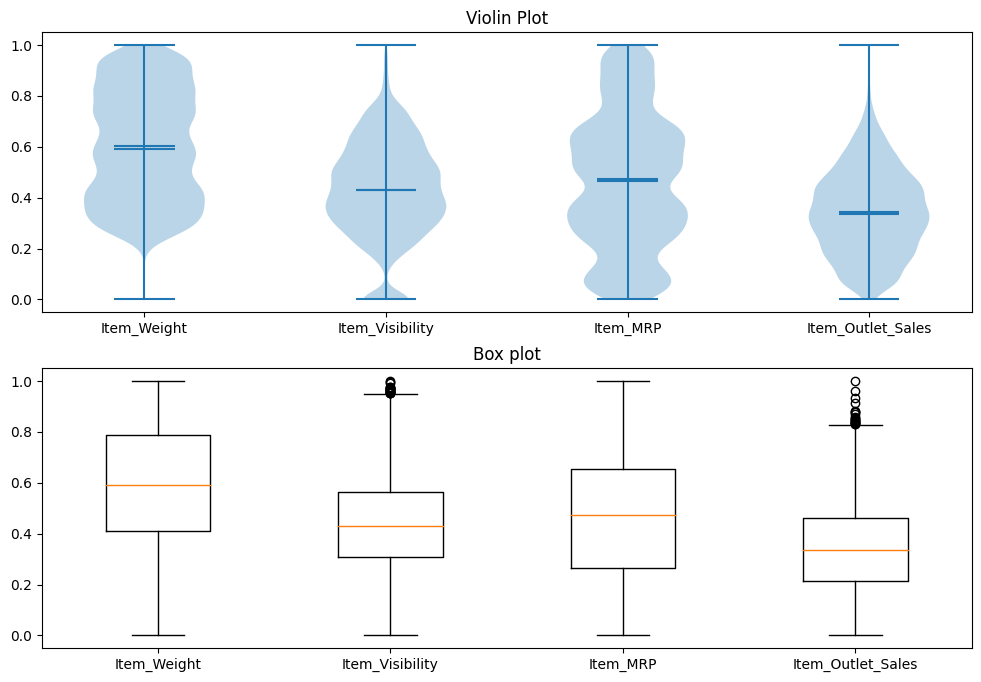

In [108]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))


axs[0].violinplot(train_to_model.loc[:, columnas_a_norm],
                    showmeans=True,
                    showmedians=True)
axs[0].set_title('Violin Plot')
axs[0].set_xticks(range(1, len(columnas_a_norm) + 1))
axs[0].set_xticklabels(columnas_a_norm)

# plot box plot
axs[1].boxplot(train_to_model.loc[:, columnas_a_norm])
axs[1].set_title('Box plot')
axs[1].set_label(columnas_a_norm)
axs[1].set_xticks(range(1, len(columnas_a_norm) + 1))
axs[1].set_xticklabels(columnas_a_norm)

plt.show()

# Modelos Machine Learning y Deep Learning

In [109]:
data_y = train_to_model.loc[:, 'Item_Outlet_Sales']
data_x = train_to_model.drop('Item_Outlet_Sales', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=1)

## Decision Trees Regresor
Vamos primero a hacer un Decision Tree comun y corriente, analizando los parametros a tunear teniendo en cuenta el desempeno en los datos de validacion. Para eso vamos a usar la funcion GridSearch con CrossValidation.

Luego analizaremos un Random Forest para mejorar mas aun el modelo.

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm

In [111]:
print(X_train.columns)
print(y_train.shape)
print(len(X_train))
print(len(y_train))
print("_"*50)
print(X_test.columns)
print(y_test.shape)
print(len(X_test))
print(len(y_test))

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24'],
      dtype='object')
(5966,)
5966
5966
__________________________________________________
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24'],
      dtype='object')
(2557,)
2557
2557


Solo a modo de analisis comparativo entre modelos voy a agregar un Random y un Naive Mean. No tiene ningun sentido funcional.

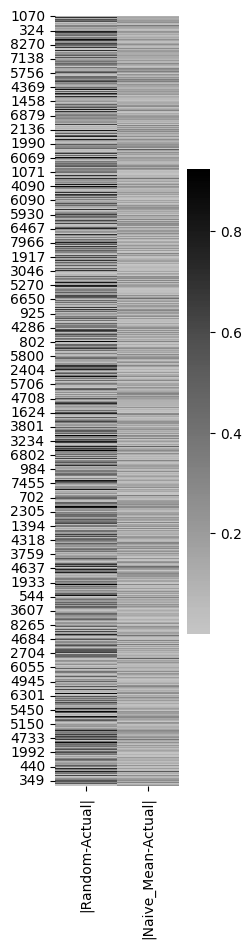

In [112]:
result_df = pd.DataFrame(index=X_test.index, columns=['Random','Naive_Mean','LR','Actual'])
result_df.Actual = y_test

# Method: Naive Mean
result_df.Naive_Mean = y_train.mean()

# Method: Random
result_df.Random = np.random.uniform(y_train.min(), y_train.max(),y_test.shape)

result_df['|Random-Actual|'] = abs(result_df.Random-result_df.Actual)
result_df['|Naive_Mean-Actual|'] = abs(result_df.Naive_Mean-result_df.Actual)


table = result_df[['|Random-Actual|','|Naive_Mean-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

## Linear Regression

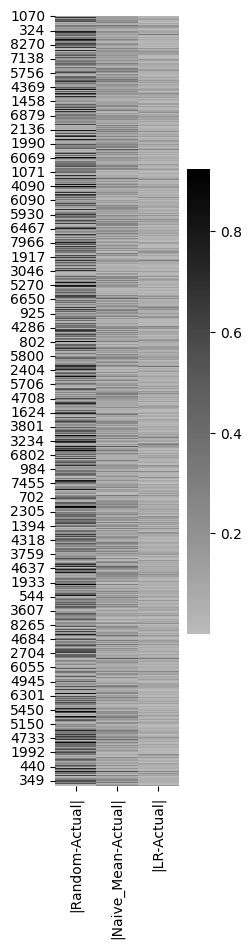

In [113]:
#Method: LR
sales_lm = LinearRegression()
sales_lm.fit(X_train, y_train)
result_df.LR =sales_lm.predict(X_test)

result_df['|LR-Actual|'] = abs(result_df.LR-result_df.Actual)


table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [114]:
metric_df = pd.DataFrame(index = ['ME','RMSE', 'MAE','MAPE'] ,
                         columns = ['Random','Naive_Mean','LR'])

n_test = len(result_df)

for m in metric_df.columns:
    metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
    metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
    metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
    metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100
metric_df

<ipython-input-114-bee430970f43>:10: RuntimeWarning: divide by zero encountered in double_scalars
  metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100
<ipython-input-114-bee430970f43>:10: RuntimeWarning: divide by zero encountered in double_scalars
  metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100
<ipython-input-114-bee430970f43>:10: RuntimeWarning: divide by zero encountered in double_scalars
  metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100


,Random,Naive_Mean,LR
ME,-0.158276,-0.003957,0.002555
RMSE,0.373595,0.170281,0.099239
MAE,0.304812,0.140944,0.077726
MAPE,inf,inf,inf


Vemos que el modelo de LR en el grafico se ve con un color gris un poco mas claro que el resto.

El valor Random logicamente tiene el valor menos acertado de los tres.

El valor Naive Mean tampoco tiene el mejor de los resultados, pero se acerca aunque sea un poco.

La prediccion del LR si bien tiene un resultado mejor que las otras dos en las 4 metricas planteadas, teniendo en cuenta que las otras dos no tienen sentido de ser, es bastante flojo el resultado. Era relativamente esperable teniendo en cuenta que los analisis de correlacion que encontrabamos entre las variables practicamente no arrojaban correlacion.

## MLP

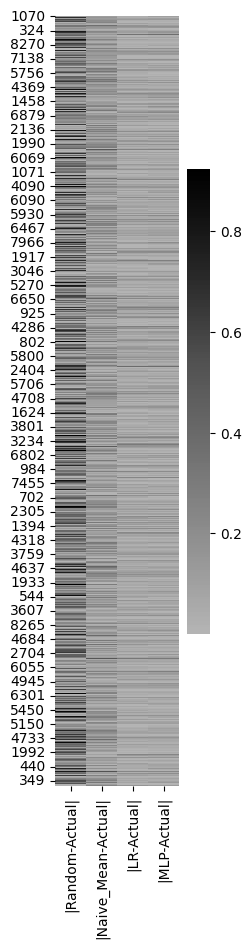

In [115]:
sales_mlp = MLPRegressor(hidden_layer_sizes=10,max_iter=2000)
sales_mlp.fit(X_train, y_train)

result_df['MLP'] = sales_mlp.predict(X_test)
result_df['|MLP-Actual|'] = abs(result_df.MLP-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [116]:
m='MLP'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

<ipython-input-116-6fca3b292713>:6: RuntimeWarning: divide by zero encountered in double_scalars
  metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100


,Random,Naive_Mean,LR,MLP
ME,-0.158276,-0.003957,0.002555,0.005933
RMSE,0.373595,0.170281,0.099239,0.102130
MAE,0.304812,0.140944,0.077726,0.080001
MAPE,inf,inf,inf,inf


In [117]:
# Create tuning (validation) set: devide the trainset

X_train_s, X_tune, y_train_s, y_tune = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)

print('X_train_s Shape: ', X_train_s.shape)
print('X_tune Shape: ', X_tune.shape)
print('y_train_s Shape: ', y_train_s.shape)
print('y_tune Shape: ', y_tune.shape)

X_train Shape:  (5966, 28)
y_train Shape:  (5966,)
X_train_s Shape:  (4772, 28)
X_tune Shape:  (1194, 28)
y_train_s Shape:  (4772,)
y_tune Shape:  (1194,)


In [118]:
random_options = range(1,10)

tune_df = pd.DataFrame(index = random_options,
                       columns=['RSME'])
tune_df
n=len(y_tune)
for random_o in random_options:
    sales_mlp = MLPRegressor(hidden_layer_sizes=(10), max_iter=2000,
                               activation='relu',solver='lbfgs', learning_rate='invscaling',
                               learning_rate_init= 0.01, shuffle = False, alpha = 0.00005, random_state=random_o)
    sales_mlp.fit(X_train_s, y_train_s)
    y_tune_predict = sales_mlp.predict(X_tune)
    RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
    tune_df.at[random_o,'RSME'] = RSME
    print(random_o)

1
2
3
4
5
6
7
8
9


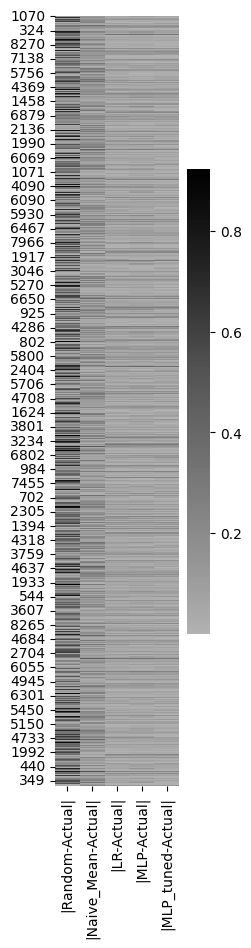

<ipython-input-119-6c63cdc3e135>:19: RuntimeWarning: divide by zero encountered in double_scalars
  metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100


,Random,Naive_Mean,LR,MLP,MLP_tuned
ME,-0.158276,-0.003957,0.002555,0.005933,0.002359
RMSE,0.373595,0.170281,0.099239,0.102130,0.097072
MAE,0.304812,0.140944,0.077726,0.080001,0.074317
MAPE,inf,inf,inf,inf,inf


In [119]:
sales_mlp = MLPRegressor(hidden_layer_sizes=(10), max_iter=2000,
                               activation='relu',solver='lbfgs', learning_rate='invscaling',
                               learning_rate_init= 0.01, shuffle = False, alpha = 0.00005,random_state=3)

sales_mlp.fit(X_train_s, y_train_s)
result_df['MLP_tuned'] = sales_mlp.predict(X_test)
result_df['|MLP_tuned-Actual|'] = abs(result_df.MLP_tuned-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|','|MLP_tuned-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()
m='MLP_tuned'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

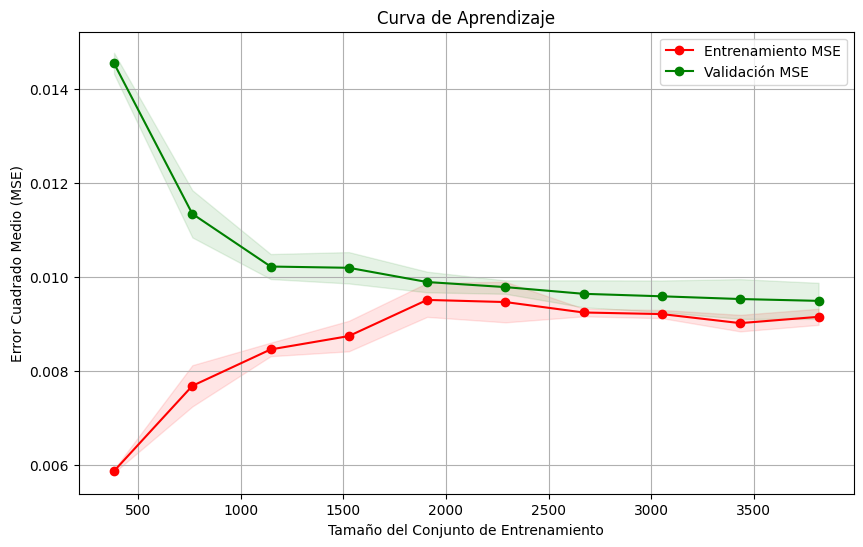

In [120]:
from sklearn.model_selection import learning_curve

# Define el modelo MLPRegressor (sales_mlp) y los datos (X_train_s, y_train_s)

# Define un rango de tamaños de conjunto de entrenamiento
train_sizes = np.linspace(0.1, 1.0, 10)  # Puedes ajustar los valores según tus necesidades

# Calcula las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    sales_mlp, X_train_s, y_train_s, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error')

# Calcula los promedios y las desviaciones estándar de los puntajes
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Grafica la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Error Cuadrado Medio (MSE)")
plt.grid()

# Grafica las curvas de entrenamiento y validación
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Entrenamiento MSE")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Validación MSE")

plt.legend(loc="best")
plt.show()

Se ve claramente que el metodo evita tanto el underfitting como el overfitting.

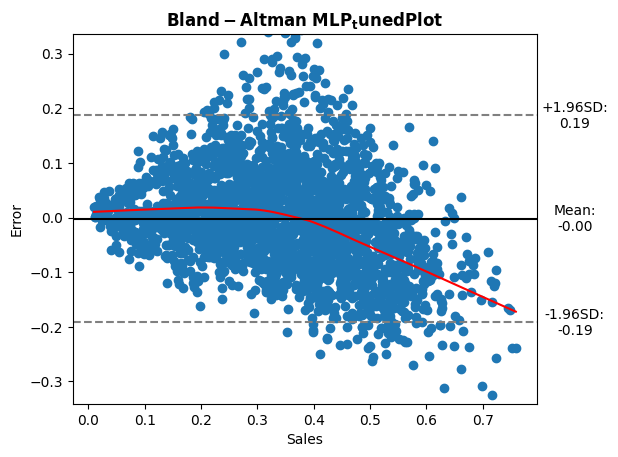

In [ ]:
def bland_altman_plot(data1, data2, *args, **kwargs):
    data1 = np.asarray(data1)
    data2 = np.asarray(data2)
    mean = np.mean([data1, data2], axis=0)
    diff = data1 - data2  # Difference between data1 and data2
    md = np.mean(diff)  # Mean of the difference
    sd = np.std(diff, axis=0)  # Standard deviation of the difference
    CI_low = md - 1.96 * sd
    CI_high = md + 1.96 * sd
    lowess = sm.nonparametric.lowess(diff, mean, frac=0.5)

    plt.scatter(mean, diff, *args, **kwargs)
    plt.plot(lowess[:, 0], lowess[:, 1], color='red')
    plt.axhline(md, color='black', linestyle='-')
    plt.axhline(md + 1.96 * sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96 * sd, color='gray', linestyle='--')
    return md, sd, mean, CI_low, CI_high


md, sd, mean, CI_low, CI_high = bland_altman_plot(result_df['MLP_tuned'], result_df.Actual)

plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{MLP_tuned Plot}$")
plt.xlabel("Sales")
plt.ylabel("Error")
plt.ylim(md - 3.5 * sd, md + 3.5 * sd)

BA_plot = np.min(mean) + (np.max(mean) - np.min(mean)) * 1.14

plt.text(BA_plot, md - 1.96 * sd,
         r'-1.96SD:' + "\n" + "%.2f" % CI_low,
         ha="center",
         va="center",
         )
plt.text(BA_plot, md + 1.96 * sd,
         r'+1.96SD:' + "\n" + "%.2f" % CI_high,
         ha="center",
         va="center",
         )
plt.text(BA_plot, md,
         r'Mean:' + "\n" + "%.2f" % md,
         ha="center",
         va="center",
         )
plt.subplots_adjust(right=0.85)

plt.show()

El Bland-Altman Plot muestra que para las ventas bajas, el modelo predice correctamente, segun lo esperado. Pero a medida que las ventas aumentan, el modelo tiende a predecir ventas mas bajas.

Esto puede deberse a que los datos con los que fue entrenado el modelo fueron en su gran mayoria valores de ventas bajos. Es decir, generalmente el modelo tiende a predecir valores bajos, porque eso es a lo que esta acostumbrado.

Para ventas bajas el modelo da resultados aceptables. Para ventas mas altas podriamos esperar mejorar el modelo o captar mas datos para reentrenar el modelo con mejores datos.

In [121]:
sales_dt = DecisionTreeRegressor()
sales_dt.fit(X_train,y_train)

DecisionTreeRegressor()

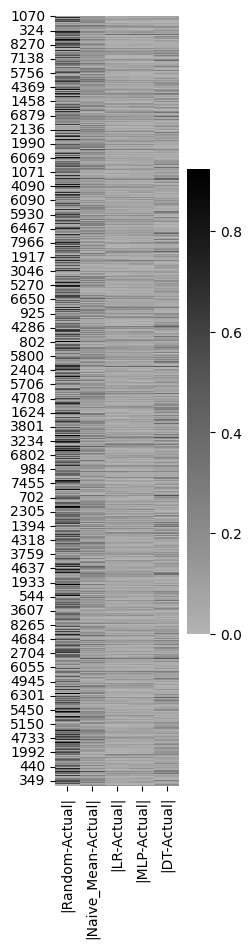

In [122]:
result_df['DT'] = sales_dt.predict(X_test)
result_df['|DT-Actual|'] = abs(result_df.DT-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|','|DT-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()


In [123]:
m='DT'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

<ipython-input-123-7c52357e42cd>:6: RuntimeWarning: divide by zero encountered in double_scalars
  metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100


,Random,Naive_Mean,LR,MLP,MLP_tuned,DT
ME,-0.158276,-0.003957,0.002555,0.005933,0.002359,0.005940
RMSE,0.373595,0.170281,0.099239,0.102130,0.097072,0.141688
MAE,0.304812,0.140944,0.077726,0.080001,0.074317,0.107532
MAPE,inf,inf,inf,inf,inf,inf


In [ ]:
param_grid = {
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter' : ['best','random'],
    'max_depth': [50, 60, 70, 80, 90, 100],
    'min_samples_split': [5, 10, 20, 30, 40],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}

gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
gridSearch.fit(X_train, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  -0.009737680396399892
Initial parameters:  {'criterion': 'absolute_error', 'max_depth': 70, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20, 'splitter': 'best'}


In [ ]:
param_grid = {
    'criterion':['absolute_error'],
    'splitter' : ['best'],
    'max_depth': [66,67,68,69,70,71,72,73,74],
    'min_samples_split': [15, 17, 20, 22, 25],
    'min_impurity_decrease': [0.0005],
}

gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
gridSearch.fit(X_train, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  -0.009737680396399892
Initial parameters:  {'criterion': 'absolute_error', 'max_depth': 66, 'min_impurity_decrease': 0.0005, 'min_samples_split': 15, 'splitter': 'best'}


In [124]:
sales_dt = DecisionTreeRegressor(criterion='absolute_error', splitter='best', max_depth=66,
                           min_samples_split = 15, min_impurity_decrease = 0.005)
sales_dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=66,
                      min_impurity_decrease=0.005, min_samples_split=15)

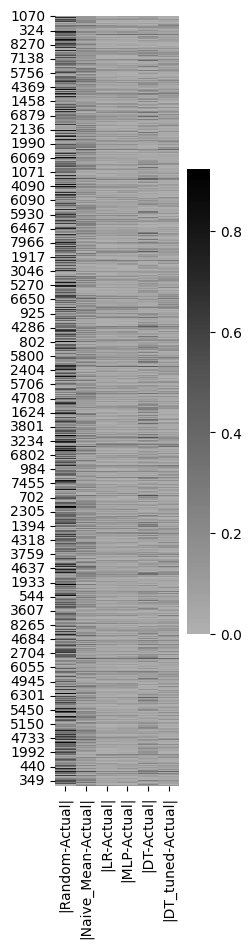

In [125]:
result_df['DT_tuned'] = sales_dt.predict(X_test)
result_df['|DT_tuned-Actual|'] = abs(result_df.DT_tuned-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|',
                   '|DT-Actual|','|DT_tuned-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [126]:
m='DT_tuned'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

<ipython-input-126-d71ef96f6c9b>:6: RuntimeWarning: divide by zero encountered in double_scalars
  metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100


,Random,Naive_Mean,LR,MLP,MLP_tuned,DT,DT_tuned
ME,-0.158276,-0.003957,0.002555,0.005933,0.002359,0.005940,0.007403
RMSE,0.373595,0.170281,0.099239,0.102130,0.097072,0.141688,0.109688
MAE,0.304812,0.140944,0.077726,0.080001,0.074317,0.107532,0.085018
MAPE,inf,inf,inf,inf,inf,inf,inf


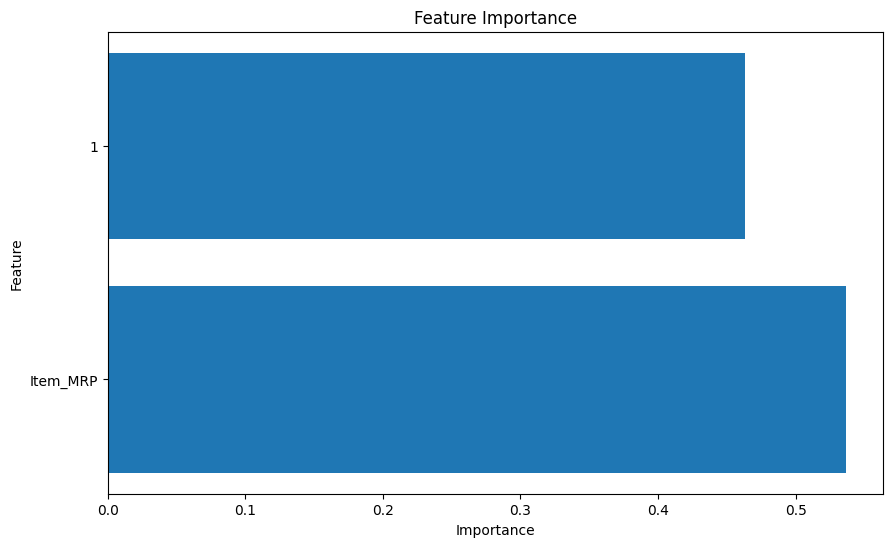

In [131]:
# Obtén la importancia de las características desde el modelo
feature_importance = sales_dt.feature_importances_

# Obtiene los nombres de las características o variables originales
feature_names = X_train.columns  # Asegúrate de que X_train sea un DataFrame de pandas

# Crea un DataFrame para visualizar las importancias de las características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df[feature_importance_df['Importance'] > 0]

# Ordena las características por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Grafica las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Como vemos, las unicas dos variables que explican las decisiones tomadas por el arbol de decisiones son 'Item_MRP' y la primer columna a la que se le hizo el OneHotEncoding.

Es curioso que el modelo no tome ninguna otra variable en consideracion para llegar a un resultado.

# SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
sales_svm = SVR(kernel='linear',
            C=1, epsilon=0.1)

sales_svm.fit(X_train, y_train)

prediction = sales_svm.predict(X_test)

In [ ]:
sales_svm = SVR(kernel='linear', C=1, epsilon=0.1)

# Realizar validación cruzada
scores = cross_val_score(sales_svm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-scores)

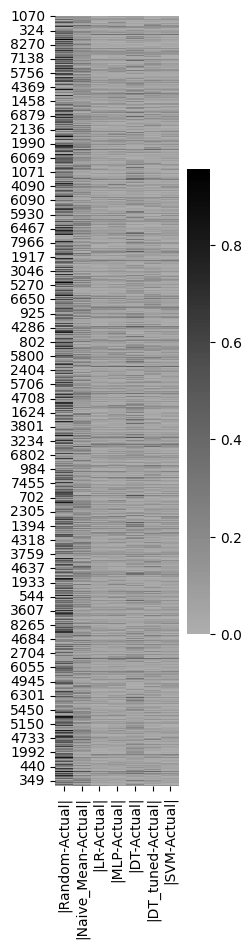

In [ ]:
result_df['SVM'] = sales_svm.predict(X_test)
result_df['|SVM-Actual|'] = abs(result_df.SVM-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|',
                   '|DT-Actual|','|DT_tuned-Actual|', '|SVM-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [ ]:
m='SVM'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

<ipython-input-485-350167d54df6>:6: RuntimeWarning: divide by zero encountered in double_scalars
  metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100


,Random,Naive_Mean,LR,MLP,MLP_tuned,DT,DT_tuned,SVM
ME,-0.171952,-0.003957,0.002555,0.008115,0.002416,0.006817,0.007403,0.002733
RMSE,0.380505,0.170281,0.099239,0.108939,0.096698,0.140814,0.109688,0.099278
MAE,0.312464,0.140944,0.077726,0.085758,0.074053,0.106076,0.085018,0.077687
MAPE,inf,inf,inf,inf,inf,inf,inf,inf


# Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Normalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import TensorBoard
import time
import tensorflow as tf

In [ ]:
x_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)
x_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)

In [ ]:
x_train.shape[-1]

In [ ]:
#Modelo NN
dense_layers = [2,3]
layer_sizes = [32, 64, 128]
input_shape = (x_train.shape[-1],)

for dense_layer in dense_layers:
  for layer_size in layer_sizes:
    NAME = 'nodes-{}-dense-{}'.format(layer_size, dense_layer, int(time.time()))
    print(NAME)

    tensorboard = TensorBoard(log_dir='log_sales_200_epocas/{}'.format(NAME))
    sales_NN = Sequential()
    sales_NN.add(Normalization(input_shape=input_shape))
    sales_NN.add(Flatten())

    for i in range(dense_layer):
      sales_NN.add(Dense(layer_size, activation="relu"))

    sales_NN.add(Dense(1, activation="relu"))

    sales_NN.compile(loss=tf.keras.losses.mean_squared_error,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae'])

    sales_NN.fit(x_train, y_train,
                batch_size=300, epochs=200,
                verbose=2, validation_split=0.2,
                callbacks = [tensorboard])

In [ ]:
sales_NN = Sequential()
sales_NN.add(Normalization(input_shape=(x_train.shape[-1],)))
sales_NN.add(Flatten())

sales_NN.add(Dense((x_train.shape[-1]), activation="relu"))
sales_NN.add(Dense(64, activation="relu"))
sales_NN.add(Dense(1, activation="relu"))

sales_NN.compile(loss=tf.keras.losses.mean_squared_error,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae'])

In [ ]:
history = sales_NN.fit(x_train, y_train, batch_size=300, epochs=200, verbose=2, validation_split=0.2)

# Obtener los valores de pérdida en el conjunto de entrenamiento y validación
train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/200
16/16 - 2s - loss: 0.0746 - mae: 0.2241 - val_loss: 0.0429 - val_mae: 0.1677 - 2s/epoch - 122ms/step
Epoch 2/200
16/16 - 0s - loss: 0.0323 - mae: 0.1448 - val_loss: 0.0267 - val_mae: 0.1306 - 139ms/epoch - 9ms/step
Epoch 3/200
16/16 - 0s - loss: 0.0228 - mae: 0.1227 - val_loss: 0.0195 - val_mae: 0.1114 - 137ms/epoch - 9ms/step
Epoch 4/200
16/16 - 0s - loss: 0.0173 - mae: 0.1053 - val_loss: 0.0169 - val_mae: 0.1022 - 135ms/epoch - 8ms/step
Epoch 5/200
16/16 - 0s - loss: 0.0146 - mae: 0.0961 - val_loss: 0.0149 - val_mae: 0.0949 - 157ms/epoch - 10ms/step
Epoch 6/200
16/16 - 0s - loss: 0.0130 - mae: 0.0900 - val_loss: 0.0134 - val_mae: 0.0900 - 130ms/epoch - 8ms/step
Epoch 7/200
16/16 - 0s - loss: 0.0121 - mae: 0.0866 - val_loss: 0.0128 - val_mae: 0.0876 - 127ms/epoch - 8ms/step
Epoch 8/200
16/16 - 0s - loss: 0.0113 - mae: 0.0836 - val_loss: 0.0121 - val_mae: 0.0853 - 128ms/epoch - 8ms/step
Epoch 9/200
16/16 - 0s - loss: 0.0108 - mae: 0.0815 - val_loss: 0.0118 - val_mae: 0.0843

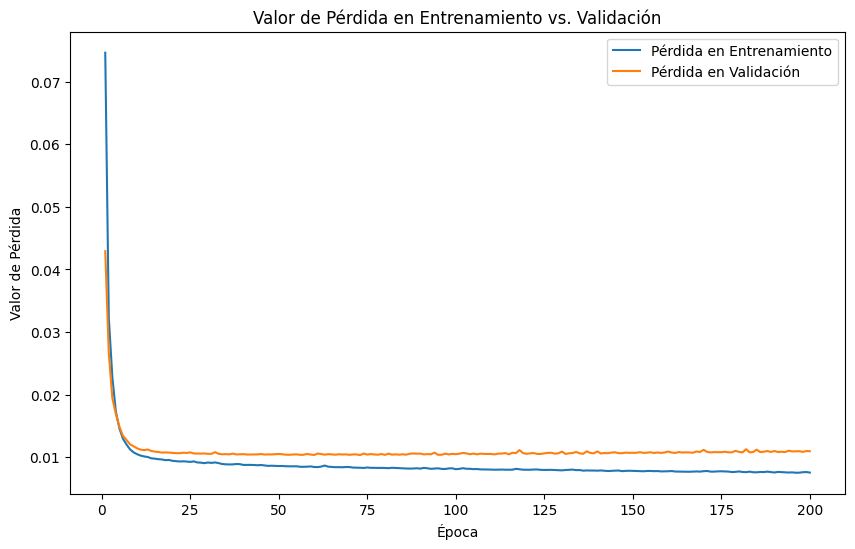

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Pérdida en Entrenamiento')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Pérdida en Validación')
plt.xlabel('Época')
plt.ylabel('Valor de Pérdida')
plt.title('Valor de Pérdida en Entrenamiento vs. Validación')
plt.legend()
plt.show()

In [ ]:
metricas = sales_NN.evaluate(x_train, y_train)
prediction = sales_NN.predict(x_test)

80/80 [==============================] - 0s 2ms/step


80/80 [==============================] - 0s 2ms/step


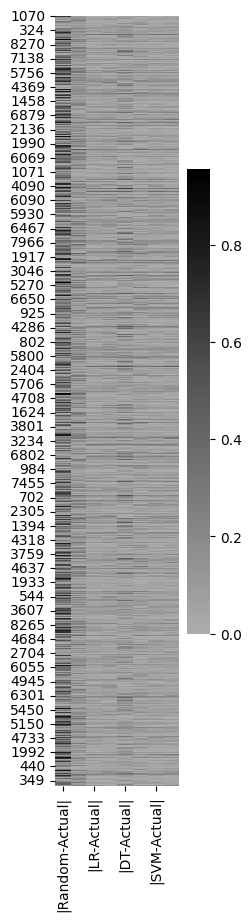

In [ ]:
result_df['NN'] = sales_NN.predict(X_test)
result_df['|NN-Actual|'] = abs(result_df.NN-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|',
                   '|DT-Actual|','|DT_tuned-Actual|', '|SVM-Actual|', '|NN-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [ ]:
m='NN'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

<ipython-input-492-abe760db7150>:6: RuntimeWarning: divide by zero encountered in double_scalars
  metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100


,Random,Naive_Mean,LR,MLP,MLP_tuned,DT,DT_tuned,SVM,NN
ME,-0.171952,-0.003957,0.002555,0.008115,0.002416,0.006817,0.007403,0.002733,0.006991
RMSE,0.380505,0.170281,0.099239,0.108939,0.096698,0.140814,0.109688,0.099278,0.100717
MAE,0.312464,0.140944,0.077726,0.085758,0.074053,0.106076,0.085018,0.077687,0.077602
MAPE,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [ ]:
def bland_altman_plot(data1, data2, *args, **kwargs):
    data1 = np.asarray(data1)
    data2 = np.asarray(data2)
    mean = np.mean([data1, data2], axis=0)
    diff = data1 - data2  # Difference between data1 and data2
    md = np.mean(diff)  # Mean of the difference
    sd = np.std(diff, axis=0)  # Standard deviation of the difference
    CI_low = md - 1.96 * sd
    CI_high = md + 1.96 * sd
    lowess = sm.nonparametric.lowess(diff, mean, frac=0.5)

    plt.scatter(mean, diff, *args, **kwargs)
    plt.plot(lowess[:, 0], lowess[:, 1])
    plt.axhline(md, color='black', linestyle='-')
    plt.axhline(md + 1.96 * sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96 * sd, color='gray', linestyle='--')
    return md, sd, mean, CI_low, CI_high


md, sd, mean, CI_low, CI_high = bland_altman_plot(result_df['NN'], result_df.Actual)

plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{NN Plot}$")
plt.xlabel("Sales")
plt.ylabel("Error")
plt.ylim(md - 3.5 * sd, md + 3.5 * sd)

BA_plot = np.min(mean) + (np.max(mean) - np.min(mean)) * 1.14

plt.text(BA_plot, md - 1.96 * sd,
         r'-1.96SD:' + "\n" + "%.2f" % CI_low,
         ha="center",
         va="center",
         )
plt.text(BA_plot, md + 1.96 * sd,
         r'+1.96SD:' + "\n" + "%.2f" % CI_high,
         ha="center",
         va="center",
         )
plt.text(BA_plot, md,
         r'Mean:' + "\n" + "%.2f" % md,
         ha="center",
         va="center",
         )
plt.subplots_adjust(right=0.85)

plt.show()

Habiendo terminado el analisis del dataset junto con la generacion de diferentes modelos, y decidirnos por usar el ML Regressor, generamos una funcion que agrupe todo el trabajo que tuvimos que hacer. De esta manera en un futuro alguien con un dataset igual al nuestro, va a poder hacer el mismo analisis y llegar al resultado propuesto por nuestro modelo.

In [ ]:
# Definimos la funcion que va a encargarse de solventar los NaN values de la variable Weight.
# Toma como parametros de entrada solamente el dataset completo del usuario, y la funcion es capaz de devolver
# la columna de la variable Weight sin valores faltantes.
def nan_values_weight(dataset_usuario):
    # Tomo indices de las filas que tienen NA en el Item_Weight
    indices_filas_NA_weight = train.loc[train.loc[:,'Item_Weight'].isna()].index

    # Le asigno los valores del identificador que tiene ese indice
    identificador_item_NA_weight = train.loc[indices_filas_NA_weight, 'Item_Identifier']

    # Dentro de los valores NA, cuantos repeticiones encontramos?
    print(len(identificador_item_NA_weight) - len(identificador_item_NA_weight.unique()))
    # Como hay repetidos, me quedo solamente con los unicos
    identificador_item_NA_weight = identificador_item_NA_weight.unique()

    # Hago diccionario que tenga por cada identificador, su weight
    item_weight = {}
    for identificador in identificador_item_NA_weight:
      # Hago un nuevo DF solo con el identificador de interes
      identificador_con_NA = train.loc[train['Item_Identifier'] == identificador, ['Item_Identifier', 'Item_Weight']]

      # Si hay mas de un valor ademas del NAN tenemos que buscar el que mas se repita para asignarlo
      if (len(identificador_con_NA.groupby('Item_Weight')) > 1):
        # Por las dudas tengamos 3 valores distintos, incluyendo el NA, uso dropna() antes de agrupar
        contador_por_grupo = pd.DataFrame({'Weight': identificador_con_NA['Item_Weight'].dropna().unique(),
                                          'Conteo' : identificador_con_NA.dropna().groupby('Item_Weight').size()})
        weight_mas_repetido = contador_por_grupo.loc[contador_por_grupo['Conteo'] == contador_por_grupo['Conteo'].max()]

        # Si aun asi siguen habiendo mas de un peso repetido en la misma cantidad de veces hacemos la media entre ellos
        if len(weight_mas_repetido) > 1:
          weight_reemplazo = weight_mas_repetido['Weight'].mean()
        else:
          weight_reemplazo = weight_mas_repetido['Weight']

      # 2 posibilidades: No hay mas de 2 weights para el producto. No hay otro producto sin NAN en su weight
      else:
        if len(identificador_con_NA['Item_Weight'].unique()) == 1:
          # Por ahora le voy a asignar valor 0. Luego lo resolveremos
          weight_reemplazo = np.array([0])
        else:
          # En caso de que no hayan varios valores de weight para un mismo producto (seria lo logico), se resuelve facil:
          weight_reemplazo = identificador_con_NA['Item_Weight'].dropna().unique()

      item_weight[identificador] = weight_reemplazo.item()

    for indice in indices_filas_NA_weight:
      train.loc[indice, 'Item_Weight'] = item_weight[train.loc[indice, 'Item_Identifier']]

    return train.loc[:, 'Item_Weight']

# Definimos la funcion que va a encargarse de solventar los NaN values de la variable Outlet_Size.
# Toma como parametros de entrada solamente el dataset completo del usuario, y la funcion es capaz de devolver
# la columna de la variable Outlet_Size sin valores faltantes.
def nan_values_osize(dataset_usuario):
  # Hago todas las variables OHE
    dataset_usuario_knn = pd.get_dummies(dataset_usuario, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type'])
    dataset_usuario_knn.loc[dataset_usuario_knn.Outlet_Size == 'Small', 'Outlet_Size'] = 1
    dataset_usuario_knn.loc[dataset_usuario_knn.Outlet_Size == 'Medium', 'Outlet_Size'] = 2
    dataset_usuario_knn.loc[dataset_usuario_knn.Outlet_Size == 'High', 'Outlet_Size'] = 3
  # Me quedo con los outlets con NAN en una lista
    outlets_missing = dataset_usuario.loc[dataset_usuario.Outlet_Size.isna(), 'Outlet_Identifier'].unique()
  # Elimino de dataset_usuario_knn los identifiers para poder hacer el KNN sobre ellos
    dataset_usuario_knn = dataset_usuario_knn.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1)
    lista_de_indices = []
    for i in outlets_missing:
  # Guardo los indices con NAN en una lista indexada
      lista_de_indices.append(dataset_usuario.loc[dataset_usuario.Outlet_Identifier == i].index)

  # Genero el KNN y lo corro con el dataset_usuario_knn. Tiene los NAN y no tiene los identificadores
    knn = KNNImputer(n_neighbors=5)
    neighbors = knn.fit_transform(dataset_usuario_knn)
  # Los resultados se guardan y no deberia haber ningun valor faltante. Se completan todos los NAN con el KNN
    result_KNN = pd.DataFrame(data=neighbors, columns=dataset_usuario_knn.columns)

    for indice in lista_de_indices:
  # Por cada outlet voy a ver que valor redondeado se le asigno
      value = round(result_KNN.loc[indice, 'Outlet_Size'].mean())

      if value <= 1:
        dataset_usuario_knn.loc[indice, 'Outlet_Size'] = 'Small'
      elif value == 2:
        dataset_usuario_knn.loc[indice, 'Outlet_Size'] = 'Medium'
      else:
        dataset_usuario_knn.loc[indice, 'Outlet_Size'] = 'High'

    return dataset_usuario_knn.loc[:, 'Outlet_Size']


# Esta funcion es la que va a usar el usuario. Pasando como input de la funcion el dataset, se encarga de devolver
# la prediccion que se genera para cada observacion.
# Dentro de esta funcion tenemos las otras dos funciones definidas anteriormente, por lo que no va a haber problema
# de pasarle a esta funcion un dataset con valores faltantes en las variables de Weight y Outlet_Size.
def realizar_predicciones(dataset_usuario):

    # Transforma Item_Fat_Content
    dataset_usuario.loc[dataset_usuario.Item_Fat_Content.isin(['Low Fat', 'LF', 'low fat']), 'Item_Fat_Content'] = 'Low Fat'
    dataset_usuario.loc[dataset_usuario.Item_Fat_Content.isin(['Regular', 'reg']), 'Item_Fat_Content'] = 'Regular'

    if dataset_usuario.loc[:, 'Item_Weight'].isnull().sum() > 0:
      dataset_usuario.loc[:, 'Item_Weight'] = nan_values_weight(dataset_usuario)

    if dataset_usuario.loc[:, 'Outlet_Size'].isnull().sum() > 0:
      dataset_usuario.loc[:, 'Outlet_Size'] = nan_values_osize(dataset_usuario)

    dataset_usuario = dataset_usuario.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1)

    # Hago el One-Hot-Encoding de las variables categoricas
    dataset_usuario = pd.get_dummies(dataset_usuario, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'])

    columnas_continuas = dataset_usuario.select_dtypes(include=['float64']).columns
    dataset_cont = dataset_usuario.loc[:, columnas_continuas]
    dataset_MCA = dataset_usuario.drop(columnas_continuas, axis = 1)

    # Hago el MCA de las variables categoricas. Las variables continuas vimos que son todas importantes y no es necesario reducir su dimensionalidad
    mca = MCA(
    n_components=25,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42,
    one_hot=False
    )

    # Tengo que agregar que son solamente las columnas categoricas
    mca.fit(dataset_MCA)
    MCA_proyectado = mca.transform(dataset_MCA)

    dataset_to_model = pd.concat([dataset_cont, MCA_proyectado], axis=1)

    # Transformacion logaritmica sumando 1 para evitar tener numeros negativos
    dataset_to_model.Item_Visibility = np.log2(dataset_to_model.Item_Visibility + 1)**(1/2)


    nombre_columnas = dataset_to_model.columns.tolist()

    # Crear un diccionario de mapeo para cambiar los nombres a cadenas de texto
    num_to_str = {col: str(col) for col in nombre_columnas}
    dataset_to_model = dataset_to_model.rename(columns= num_to_str)

    # Estandarizacion solo de variables CONTINUAS
    std_sclr = StandardScaler()
    for i in columnas_continuas:
      dataset_to_model[i] = std_sclr.fit_transform(dataset_to_model[i].values.reshape(-1, 1))

    # Normalizacion de todas las variables
    scaler = MinMaxScaler()
    dataset_to_model = pd.DataFrame(scaler.fit_transform(dataset_to_model), index=dataset_to_model.index, columns=dataset_to_model.columns)

    prediccion = sales_mlp.predict(dataset_to_model)

    max_val = 3.892118
    min_val = -2.024948

    valor_sin_normalizar = prediccion * (max_val - min_val) + min_val

    desv_std = 18.359591
    media = 42.944777

    valor_sin_estandarizar = valor_sin_normalizar * desv_std + media


    resultados = valor_sin_estandarizar**2

    return resultados

In [ ]:
resultados_test = realizar_predicciones(test)
resultados_test